***
# Data Wrangling and Exploration for NBA Data
***
`This notebook contains the data wrangling process and visualisations:`
- the NBA ELO data
- NBA RAPTOR data (includes for teams and players)
- NBA historical data
- NBA DRAYMOND data
- NBA Player data

## Objectives:
The objectives of this notebook is to join the data available, performing feature engineering and the expected end products are:
- Data for all teams with feature engineering producing features that describe team strength and player strengths
- Data for all possible active players

***** 
Author: Ridwan Amokun (Data Scientist) |
[LinkedIn](https://www.linkedin.com/in/ridwan-amokun/) |
[Medium](https://medium.com/@amokunridwan) |
[Twitter](https://twitter.com/Markyrrh) |
[GitHub](https://www.github.com/MITXy)
*****

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm

#module created for this project
from rid_utils import show_category, show_distribution, wrangle_player_data, team_finder, create_conference

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("ggplot")
pd.set_option("display.max_columns", None)

In [2]:
files = glob("C:/Users/DELL/Project/FreeWorks/NBA  Project/data/*")

count=0
for f in files:
    print(f"index {count}, filepath: {f}")
    count += 1

index 0, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\draymond.csv
index 1, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\draymond_desc.md
index 2, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\historical_RAPTOR_by_player.csv
index 3, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\historical_RAPTOR_by_team.csv
index 4, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\latest_RAPTOR_by_player.csv
index 5, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\latest_RAPTOR_by_team.csv
index 6, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\modern_RAPTOR_by_player.csv
index 7, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\modern_RAPTOR_by_team.csv
index 8, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\NBA Player Stats(1950 - 2022).csv
index 9, filepath: C:/Users/DELL/Project/FreeWorks/NBA  Project/data\nba-data-historical.csv
index 10, filepath: C:/Users/DELL/Project/FreeWorks/

***
># NBA ELO Data
***
`This section consist of data concatenation of the NBA ELO data with some visualisqations`

In [3]:
nba_elo = pd.read_csv(files[11], index_col=[0])
nba_elo

,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
gameorder,,,,,,,,,,,,,,,,,,,,,,
1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN


In [4]:
nba_elo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126314 entries, 1 to 63157
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   game_id        126314 non-null  object 
 1   lg_id          126314 non-null  object 
 2   _iscopy        126314 non-null  int64  
 3   year_id        126314 non-null  int64  
 4   date_game      126314 non-null  object 
 5   seasongame     126314 non-null  int64  
 6   is_playoffs    126314 non-null  int64  
 7   team_id        126314 non-null  object 
 8   fran_id        126314 non-null  object 
 9   pts            126314 non-null  int64  
 10  elo_i          126314 non-null  float64
 11  elo_n          126314 non-null  float64
 12  win_equiv      126314 non-null  float64
 13  opp_id         126314 non-null  object 
 14  opp_fran       126314 non-null  object 
 15  opp_pts        126314 non-null  int64  
 16  opp_elo_i      126314 non-null  float64
 17  opp_elo_n      126314 non-null

In [5]:
nba_elo2 = pd.read_csv(files[12], index_col=[0])
nba_elo2

,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
date,,,,,,,,,,,,,,,,,,,,,,,,,,
1946-11-01,1947,0,NaN,TRH,NYK,1300.000000,1300.000000,0.640065,0.359935,1293.276700,1306.723300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,68,0,NaN,NaN
1946-11-02,1947,0,NaN,PRO,BOS,1300.000000,1300.000000,0.640065,0.359935,1305.154200,1294.845800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,53,0,NaN,NaN
1946-11-02,1947,0,NaN,STB,PIT,1300.000000,1300.000000,0.640065,0.359935,1304.690800,1295.309200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,51,0,NaN,NaN
1946-11-02,1947,0,NaN,CHS,NYK,1300.000000,1306.723300,0.631101,0.368899,1309.652100,1297.071200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,47,0,NaN,NaN
1946-11-02,1947,0,NaN,DTF,WSC,1300.000000,1300.000000,0.640065,0.359935,1279.618900,1320.381100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,50,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,2023,0,f,DEN,MIA,1649.957428,1640.358994,0.652693,0.347307,1656.989505,1633.326917,NaN,NaN,NaN,NaN,NaN,NaN,1706.318434,1648.857733,0.736836,0.263164,104,93,97,100.0,99.0
2023-06-04,2023,0,f,DEN,MIA,1656.989505,1633.326917,0.670812,0.329188,1648.665508,1641.650915,NaN,NaN,NaN,NaN,NaN,NaN,1716.477363,1646.757209,0.744086,0.255914,108,111,97,99.0,98.0
2023-06-07,2023,0,f,MIA,DEN,1641.650915,1648.665508,0.630711,0.369289,1623.302940,1667.013482,NaN,NaN,NaN,NaN,NaN,NaN,1650.416984,1703.748040,0.522547,0.477453,94,109,97,100.0,99.0


In [6]:
nba_elo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73363 entries, 1946-11-01 to 2023-06-12
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          73363 non-null  int64  
 1   neutral         73363 non-null  int64  
 2   playoff         4720 non-null   object 
 3   team1           73363 non-null  object 
 4   team2           73363 non-null  object 
 5   elo1_pre        73363 non-null  float64
 6   elo2_pre        73363 non-null  float64
 7   elo_prob1       73363 non-null  float64
 8   elo_prob2       73363 non-null  float64
 9   elo1_post       73363 non-null  float64
 10  elo2_post       73363 non-null  float64
 11  carm-elo1_pre   5249 non-null   float64
 12  carm-elo2_pre   5249 non-null   float64
 13  carm-elo_prob1  5249 non-null   float64
 14  carm-elo_prob2  5249 non-null   float64
 15  carm-elo1_post  5249 non-null   float64
 16  carm-elo2_post  5249 non-null   float64
 17  raptor1_pre     6269 n

In [7]:
nba_elo3 = pd.read_csv(files[14], index_col=[0])
nba_elo3

,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-18,2023,0,NaN,BOS,PHI,1657.639749,1582.247327,0.732950,0.267050,1662.198884,1577.688193,NaN,NaN,NaN,NaN,NaN,NaN,1693.243079,1641.876729,0.670612,0.329388,126,117,96,13,55
2022-10-18,2023,0,NaN,GSW,LAL,1660.620307,1442.352444,0.862011,0.137989,1663.449489,1439.523261,NaN,NaN,NaN,NaN,NaN,NaN,1615.718147,1472.173711,0.776502,0.223498,123,109,67,20,44
2022-10-19,2023,0,NaN,IND,WAS,1399.201934,1440.077372,0.584275,0.415725,1388.883119,1450.396186,NaN,NaN,NaN,NaN,NaN,NaN,1462.352663,1472.018225,0.599510,0.400490,107,114,37,28,33
2022-10-19,2023,0,NaN,DET,ORL,1393.525172,1366.089249,0.675590,0.324410,1397.248913,1362.365508,NaN,NaN,NaN,NaN,NaN,NaN,1308.969909,1349.865183,0.563270,0.436730,113,109,3,1,2
2022-10-19,2023,0,NaN,ATL,HOU,1535.408152,1351.164973,0.837022,0.162978,1538.164082,1348.409043,NaN,NaN,NaN,NaN,NaN,NaN,1618.256817,1283.328356,0.917651,0.082349,117,107,24,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,2023,0,f,DEN,MIA,1649.957428,1640.358994,0.652693,0.347307,1656.989505,1633.326917,NaN,NaN,NaN,NaN,NaN,NaN,1706.318434,1648.857733,0.736836,0.263164,104,93,97,100,99
2023-06-04,2023,0,f,DEN,MIA,1656.989505,1633.326917,0.670812,0.329188,1648.665508,1641.650915,NaN,NaN,NaN,NaN,NaN,NaN,1716.477363,1646.757209,0.744086,0.255914,108,111,97,99,98
2023-06-07,2023,0,f,MIA,DEN,1641.650915,1648.665508,0.630711,0.369289,1623.302940,1667.013482,NaN,NaN,NaN,NaN,NaN,NaN,1650.416984,1703.748040,0.522547,0.477453,94,109,97,100,99


In [8]:
nba_elo3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 2022-10-18 to 2023-06-12
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          1320 non-null   int64  
 1   neutral         1320 non-null   int64  
 2   playoff         90 non-null     object 
 3   team1           1320 non-null   object 
 4   team2           1320 non-null   object 
 5   elo1_pre        1320 non-null   float64
 6   elo2_pre        1320 non-null   float64
 7   elo_prob1       1320 non-null   float64
 8   elo_prob2       1320 non-null   float64
 9   elo1_post       1320 non-null   float64
 10  elo2_post       1320 non-null   float64
 11  carm-elo1_pre   0 non-null      float64
 12  carm-elo2_pre   0 non-null      float64
 13  carm-elo_prob1  0 non-null      float64
 14  carm-elo_prob2  0 non-null      float64
 15  carm-elo1_post  0 non-null      float64
 16  carm-elo2_post  0 non-null      float64
 17  raptor1_pre     1320 no

In [9]:
nba_elo.shape, nba_elo2.shape, nba_elo3.shape

((126314, 22), (73363, 26), (1320, 26))

In [10]:
nba_recent_games = pd.concat([nba_elo2, nba_elo3])
nba_recent_games.reset_index()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.000000,1300.000000,0.640065,0.359935,1293.276700,1306.723300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,68,0,NaN,NaN
1,1946-11-02,1947,0,NaN,PRO,BOS,1300.000000,1300.000000,0.640065,0.359935,1305.154200,1294.845800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,53,0,NaN,NaN
2,1946-11-02,1947,0,NaN,STB,PIT,1300.000000,1300.000000,0.640065,0.359935,1304.690800,1295.309200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,51,0,NaN,NaN
3,1946-11-02,1947,0,NaN,CHS,NYK,1300.000000,1306.723300,0.631101,0.368899,1309.652100,1297.071200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,47,0,NaN,NaN
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.000000,1300.000000,0.640065,0.359935,1279.618900,1320.381100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,50,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74678,2023-06-01,2023,0,f,DEN,MIA,1649.957428,1640.358994,0.652693,0.347307,1656.989505,1633.326917,NaN,NaN,NaN,NaN,NaN,NaN,1706.318434,1648.857733,0.736836,0.263164,104,93,97,100.0,99.0
74679,2023-06-04,2023,0,f,DEN,MIA,1656.989505,1633.326917,0.670812,0.329188,1648.665508,1641.650915,NaN,NaN,NaN,NaN,NaN,NaN,1716.477363,1646.757209,0.744086,0.255914,108,111,97,99.0,98.0
74680,2023-06-07,2023,0,f,MIA,DEN,1641.650915,1648.665508,0.630711,0.369289,1623.302940,1667.013482,NaN,NaN,NaN,NaN,NaN,NaN,1650.416984,1703.748040,0.522547,0.477453,94,109,97,100.0,99.0
74681,2023-06-09,2023,0,f,MIA,DEN,1623.302940,1667.013482,0.580306,0.419694,1608.411644,1681.904778,NaN,NaN,NaN,NaN,NaN,NaN,1647.613213,1716.743939,0.499753,0.500247,95,108,97,100.0,99.0


In [11]:
nba_recent_games.columns

Index(['season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2',
       'carm-elo1_post', 'carm-elo2_post', 'raptor1_pre', 'raptor2_pre',
       'raptor_prob1', 'raptor_prob2', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

In [12]:
#nba_recent_games["date"] = pd.to_datetime(nba_recent_games["date"])
nba_recent_games_2021 = nba_recent_games[nba_recent_games["season"] >= 2020]
nba_recent_games_2021.head(10)

,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-22,2020,0,NaN,TOR,NOP,1672.986505,1415.320539,0.886843,0.113157,1674.584145,1413.722899,NaN,NaN,NaN,NaN,NaN,NaN,1570.910027,1524.919692,0.700184,0.299816,130,122,70,NaN,NaN
2019-10-22,2020,0,NaN,LAC,LAL,1516.608615,1472.910316,0.695761,0.304239,1522.272040,1467.246891,NaN,NaN,NaN,NaN,NaN,NaN,1577.796320,1625.627026,0.566564,0.433436,112,102,86,NaN,NaN
2019-10-23,2020,0,NaN,CHO,CHI,1497.243026,1350.430528,0.805459,0.194541,1498.556348,1349.117206,NaN,NaN,NaN,NaN,NaN,NaN,1353.401527,1463.721552,0.488451,0.511549,126,125,16,NaN,NaN
2019-10-23,2020,0,NaN,IND,DET,1509.543437,1475.760043,0.683547,0.316453,1494.641476,1490.662004,NaN,NaN,NaN,NaN,NaN,NaN,1504.513476,1401.768520,0.762733,0.237267,110,119,30,NaN,NaN
2019-10-23,2020,0,NaN,ORL,CLE,1543.184270,1349.547207,0.844265,0.155735,1545.639345,1347.092132,NaN,NaN,NaN,NaN,NaN,NaN,1531.390741,1353.206762,0.831140,0.168860,94,85,26,NaN,NaN
2019-10-23,2020,0,NaN,MIA,MEM,1498.745533,1459.007730,0.690914,0.309086,1507.535018,1450.218244,NaN,NaN,NaN,NaN,NaN,NaN,1506.590093,1466.193364,0.688746,0.311254,120,101,45,NaN,NaN
2019-10-23,2020,0,NaN,PHI,BOS,1582.396776,1577.783552,0.646160,0.353840,1590.795814,1569.384514,NaN,NaN,NaN,NaN,NaN,NaN,1650.774184,1568.193391,0.734324,0.265676,107,93,87,NaN,NaN
2019-10-23,2020,0,NaN,BRK,MIN,1494.767592,1465.413016,0.678006,0.321994,1488.654059,1471.526549,NaN,NaN,NaN,NaN,NaN,NaN,1503.498342,1575.423408,0.538667,0.461333,126,127,67,NaN,NaN
2019-10-23,2020,0,NaN,DAL,WAS,1462.203595,1434.800503,0.675549,0.324451,1467.550235,1429.453863,NaN,NaN,NaN,NaN,NaN,NaN,1565.883082,1419.180982,0.808291,0.191709,108,100,46,NaN,NaN


In [13]:
nba_recent_games_2021.drop(columns=['carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1',
                                    'carm-elo_prob2','carm-elo1_post', 'carm-elo2_post'], inplace=True)
nba_recent_games_2021.var()

season              1.318780
neutral             0.027708
elo1_pre         9702.436496
elo2_pre         9735.660244
elo_prob1           0.027369
elo_prob2           0.027369
elo1_post        9835.979685
elo2_post        9711.744300
raptor1_pre     14494.308154
raptor2_pre     14385.255392
raptor_prob1        0.036569
raptor_prob2        0.036569
score1            154.359864
score2            153.249827
quality           779.272541
importance        838.298894
total_rating      577.859753
dtype: float64

In [14]:
game_outcome=[]

for game in nba_recent_games_2021.values:
    if game[-5] > game[-4]:
        game_outcome.append("W")
    else:
        game_outcome.append("L")
        
nba_recent_games_2021["game_outcome"] = game_outcome

In [15]:
nba_recent_games_2021.head()

,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,game_outcome
date,,,,,,,,,,,,,,,,,,,,,
2019-10-22,2020,0,NaN,TOR,NOP,1672.986505,1415.320539,0.886843,0.113157,1674.584145,1413.722899,1570.910027,1524.919692,0.700184,0.299816,130,122,70,NaN,NaN,W
2019-10-22,2020,0,NaN,LAC,LAL,1516.608615,1472.910316,0.695761,0.304239,1522.272040,1467.246891,1577.796320,1625.627026,0.566564,0.433436,112,102,86,NaN,NaN,W
2019-10-23,2020,0,NaN,CHO,CHI,1497.243026,1350.430528,0.805459,0.194541,1498.556348,1349.117206,1353.401527,1463.721552,0.488451,0.511549,126,125,16,NaN,NaN,W
2019-10-23,2020,0,NaN,IND,DET,1509.543437,1475.760043,0.683547,0.316453,1494.641476,1490.662004,1504.513476,1401.768520,0.762733,0.237267,110,119,30,NaN,NaN,L
2019-10-23,2020,0,NaN,ORL,CLE,1543.184270,1349.547207,0.844265,0.155735,1545.639345,1347.092132,1531.390741,1353.206762,0.831140,0.168860,94,85,26,NaN,NaN,W


In [16]:
nba_recent_games_2021.groupby("team1")[nba_recent_games_2021.columns.to_list()].sum()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
team1,,,,,,,,,,,,,,,,,
ATL,424596,0,314274.598137,319131.515760,125.802686,84.197314,314141.710402,319264.403496,319472.634019,314007.562800,134.559701,75.440299,24565,24043,11029,5148.0,6500.0
BOS,485257,12,390994.769302,364173.778866,179.756803,60.243197,390600.122323,364568.425845,394120.285267,364570.116387,177.845578,62.154422,27659,25969,17340,5177.0,8634.0
BRK,426609,6,323878.990132,319212.252046,137.319824,73.680176,323406.767433,319684.474746,320565.764611,316635.143292,131.356337,79.643663,23819,23348,11196,3639.0,5398.0
CHI,394268,0,286461.408864,294700.880292,112.030749,82.969251,286151.554941,295010.734216,284745.453496,293110.527242,107.880786,87.119214,21758,21589,8620,4573.0,5589.0
CHO,384164,1,274588.090072,285910.251591,104.887782,85.112218,273784.790604,286713.551059,265581.743577,283695.827163,93.247350,96.752650,20743,21419,6018,2991.0,3654.0
CLE,408424,0,299140.880951,303206.843879,120.749810,81.250190,298921.083507,303426.641322,294546.942757,300716.411625,114.222533,87.777467,22187,21817,8212,3485.0,5152.0
DAL,426603,7,328134.993131,318390.145632,143.460093,67.539907,327585.926780,318939.211983,332752.115038,315205.711427,147.732240,63.267760,23865,23181,12990,3553.0,5724.0
DEN,473119,13,371399.537866,355963.469117,163.884630,70.115370,371475.020061,355887.986922,374308.156251,354847.345421,173.262906,60.737094,27112,25612,15912,3823.0,6740.0
DET,388204,3,262104.682886,288984.411855,85.225178,106.774822,261512.524619,289576.570122,253154.801207,286106.696964,76.359987,115.640013,20908,21805,3649,897.0,1542.0


In [17]:
nba_recent_games_2021.isnull().sum()

season             0
neutral            0
playoff         5829
team1              0
team2              0
elo1_pre           0
elo2_pre           0
elo_prob1          0
elo_prob2          0
elo1_post          0
elo2_post          0
raptor1_pre        0
raptor2_pre        0
raptor_prob1       0
raptor_prob2       0
score1             0
score2             0
quality            0
importance      2314
total_rating    2314
game_outcome       0
dtype: int64

In [18]:
nba_recent_games_2021['win'] = nba_recent_games_2021['game_outcome'].apply(lambda outcome: 1 if outcome == 'W' else 0)

nba_recent_games_2021['loss'] = nba_recent_games_2021['game_outcome'].apply(lambda outcome: 1 if outcome == 'L' else 0)

# Group the data by the correct column name for teams and calculate the average of scores, wins, and losses
team_summary = nba_recent_games_2021.groupby('team1').agg({
    'score1': 'mean',
    'score2': 'mean',
    'elo1_pre': 'mean',  
    'elo2_pre': 'mean',
    'elo_prob1': 'mean',
    'elo_prob2': 'mean',
    'elo1_post': 'mean',
    'elo2_post': 'mean',
    'raptor1_pre': 'mean',
    'raptor2_pre': 'mean',
    'raptor_prob1': 'mean',
    'raptor_prob2': 'mean',
    'win': 'sum', 
    'loss': 'sum', 
}).reset_index()

team_summary.rename(columns={"team1": "team"}, inplace=True)

# Display the team summary
team_summary

,team,score1,score2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,win,loss
0,ATL,116.976190,114.490476,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240,122,88
1,BOS,115.245833,108.204167,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977,160,80
2,BRK,112.886256,110.654028,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458,121,90
3,CHI,111.579487,110.712821,1469.032866,1511.286566,0.574517,0.425483,1467.443871,1512.875560,1460.233095,1503.130909,0.553235,0.446765,100,95
4,CHO,109.173684,112.731579,1445.200474,1504.790798,0.552041,0.447959,1440.972582,1509.018690,1397.798650,1493.135932,0.490776,0.509224,76,114
5,CLE,109.836634,108.004950,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542,113,89
6,DAL,113.104265,109.862559,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847,123,88
7,DEN,115.863248,109.452991,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560,170,64
8,DET,108.895833,113.567708,1365.128557,1505.127145,0.443881,0.556119,1362.044399,1508.211303,1318.514590,1490.139047,0.397708,0.602292,55,137
9,GSW,115.444954,110.096330,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587,149,69


The statistical values are as follows:
 Minimum value:108.90
 Maximum value: 118.09
 Mode: 108.90 
 Mean: 113.54 
 Standard Deviation: 2.48 
 Variance: 1.57 
 Median: 113.64


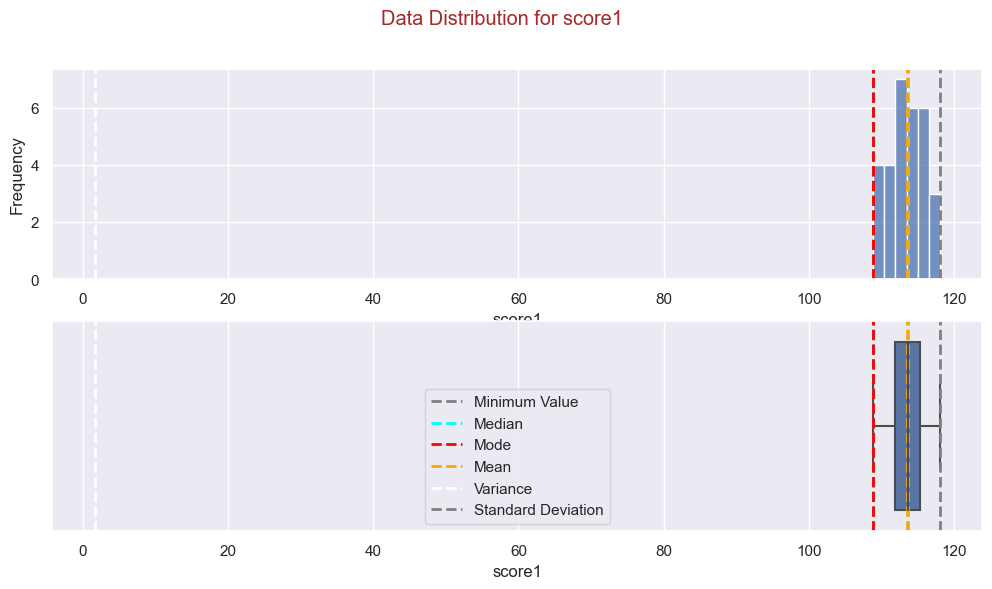

The statistical values are as follows:
 Minimum value:107.44
 Maximum value: 117.37
 Mode: 107.44 
 Mean: 111.64 
 Standard Deviation: 2.94 
 Variance: 1.71 
 Median: 110.77


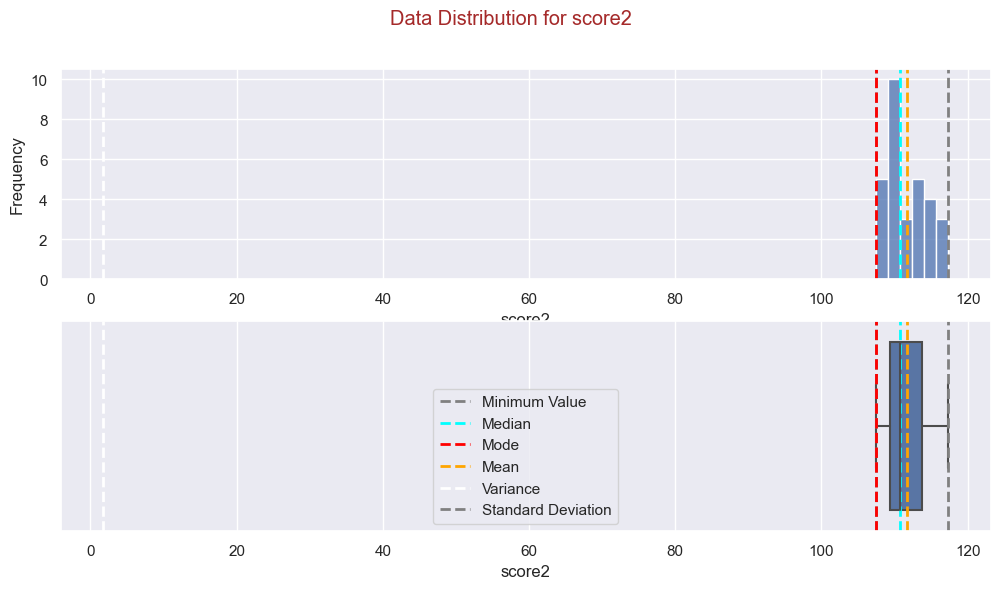

The statistical values are as follows:
 Minimum value:1365.13
 Maximum value: 1629.14
 Mode: 1365.13 
 Mean: 1509.81 
 Standard Deviation: 69.40 
 Variance: 8.33 
 Median: 1502.16


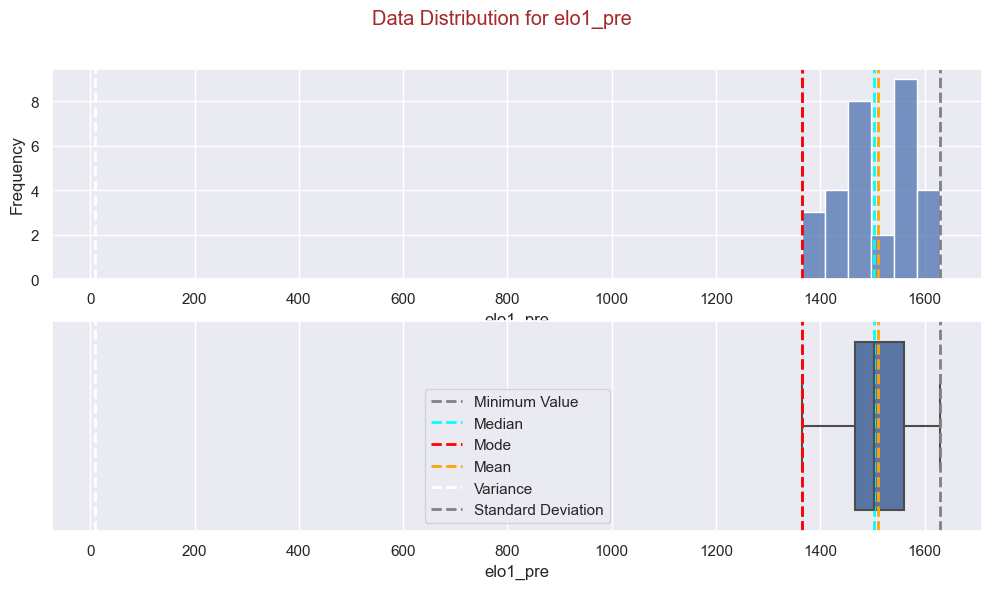

The statistical values are as follows:
 Minimum value:1500.21
 Maximum value: 1526.07
 Mode: 1500.21 
 Mean: 1512.79 
 Standard Deviation: 6.58 
 Variance: 2.56 
 Median: 1512.42


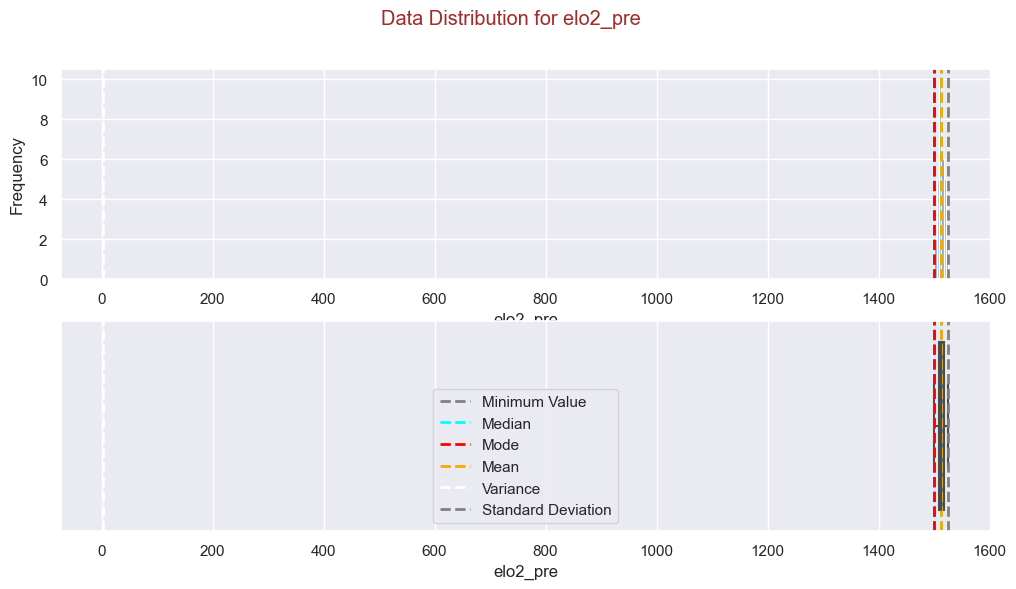

The statistical values are as follows:
 Minimum value:0.44
 Maximum value: 0.75
 Mode: 0.44 
 Mean: 0.62 
 Standard Deviation: 0.08 
 Variance: 0.29 
 Median: 0.61


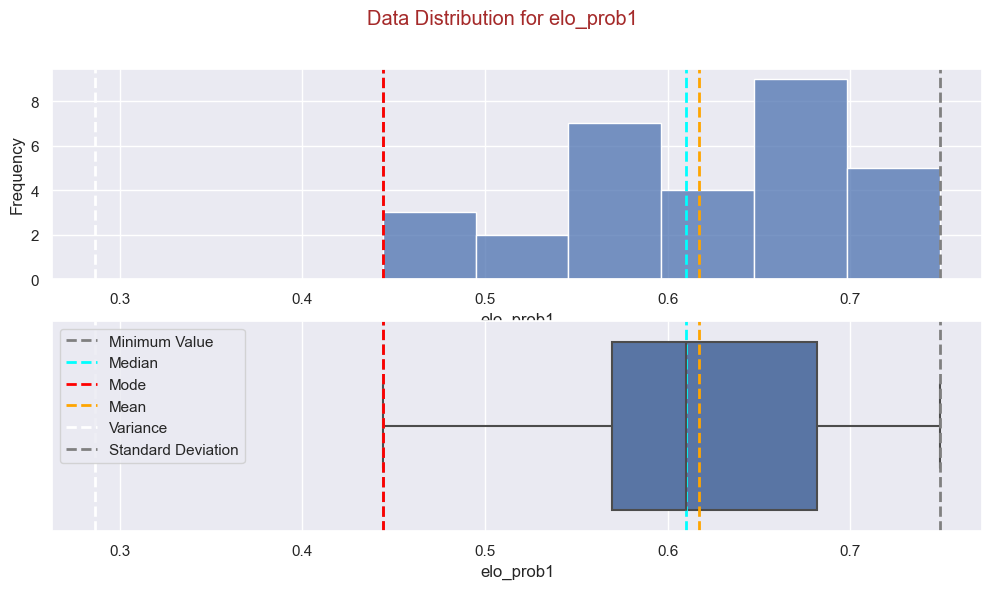

The statistical values are as follows:
 Minimum value:0.25
 Maximum value: 0.56
 Mode: 0.25 
 Mean: 0.38 
 Standard Deviation: 0.08 
 Variance: 0.29 
 Median: 0.39


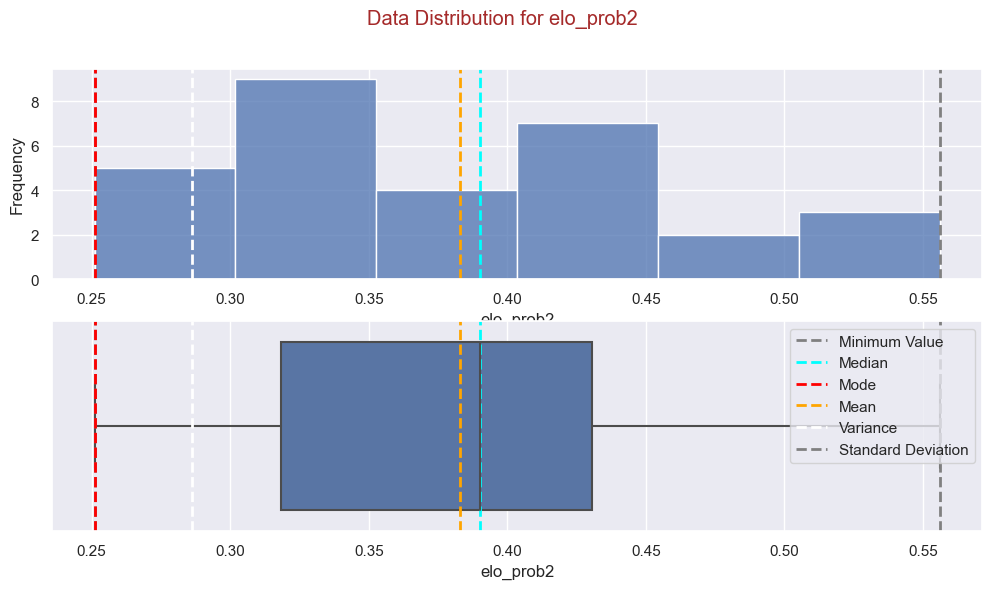

The statistical values are as follows:
 Minimum value:1362.04
 Maximum value: 1627.50
 Mode: 1362.04 
 Mean: 1508.14 
 Standard Deviation: 70.01 
 Variance: 8.37 
 Median: 1501.30


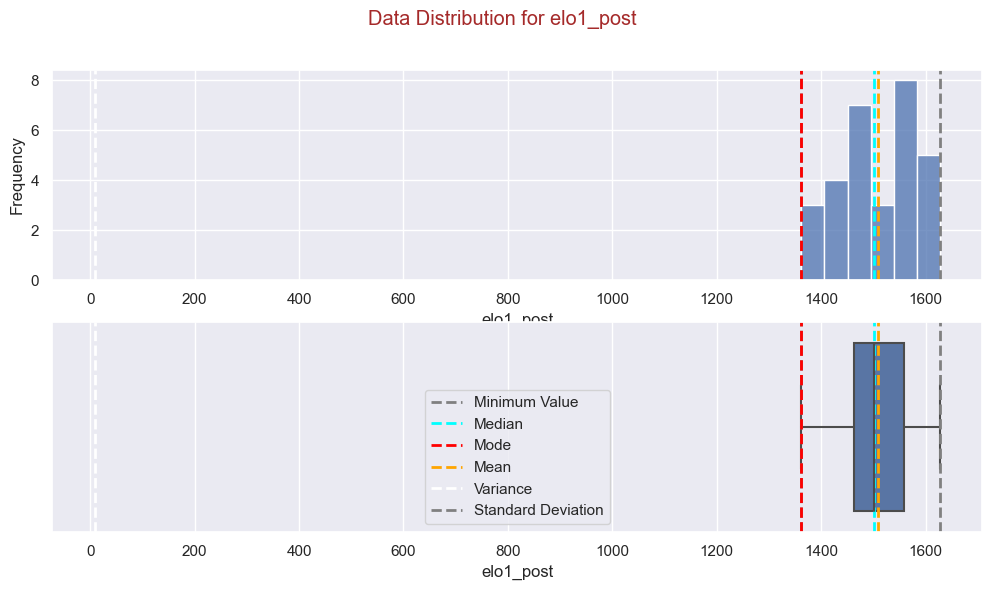

The statistical values are as follows:
 Minimum value:1502.08
 Maximum value: 1527.25
 Mode: 1502.08 
 Mean: 1514.47 
 Standard Deviation: 6.16 
 Variance: 2.48 
 Median: 1515.07


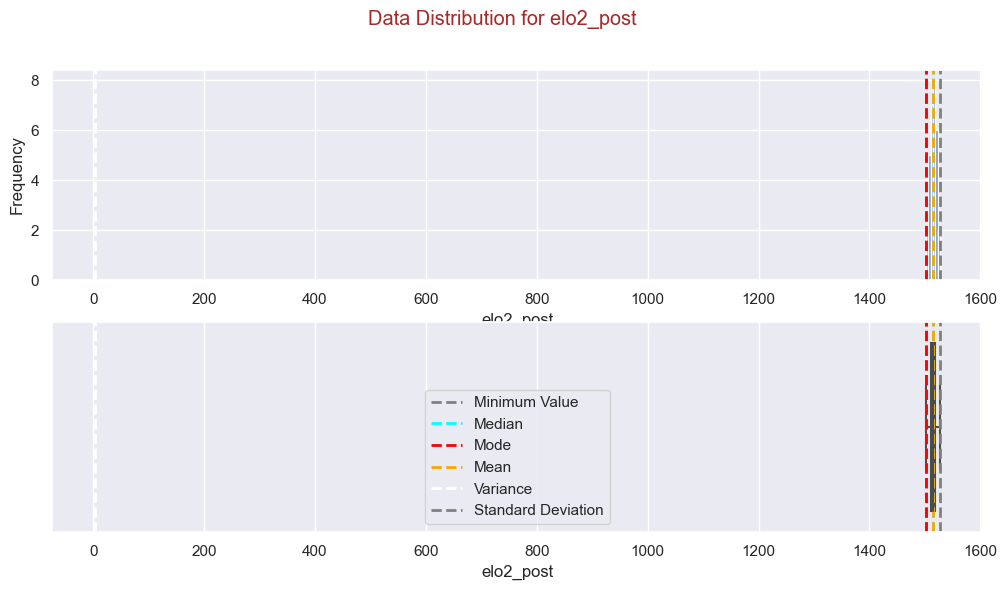

The statistical values are as follows:
 Minimum value:1318.51
 Maximum value: 1642.17
 Mode: 1318.51 
 Mean: 1500.58 
 Standard Deviation: 81.57 
 Variance: 9.03 
 Median: 1514.80


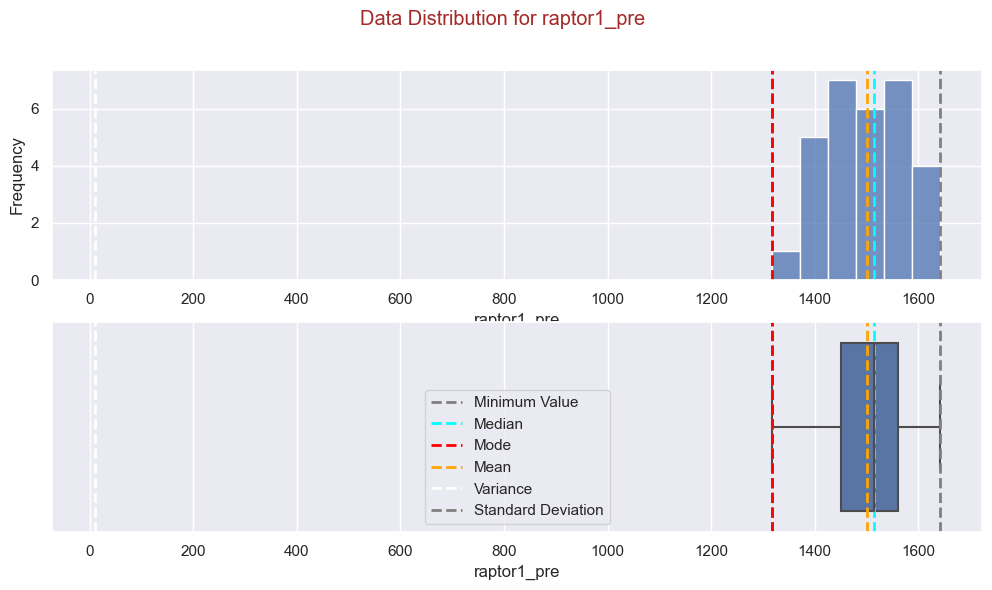

The statistical values are as follows:
 Minimum value:1488.04
 Maximum value: 1523.31
 Mode: 1488.04 
 Mean: 1500.83 
 Standard Deviation: 10.07 
 Variance: 3.17 
 Median: 1499.60


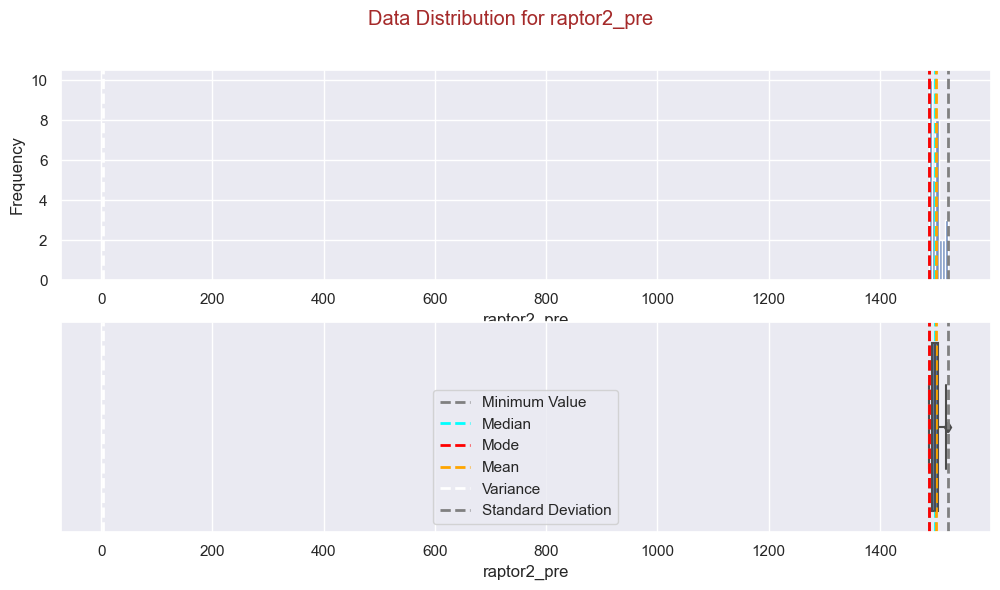

The statistical values are as follows:
 Minimum value:0.40
 Maximum value: 0.74
 Mode: 0.40 
 Mean: 0.60 
 Standard Deviation: 0.09 
 Variance: 0.31 
 Median: 0.61


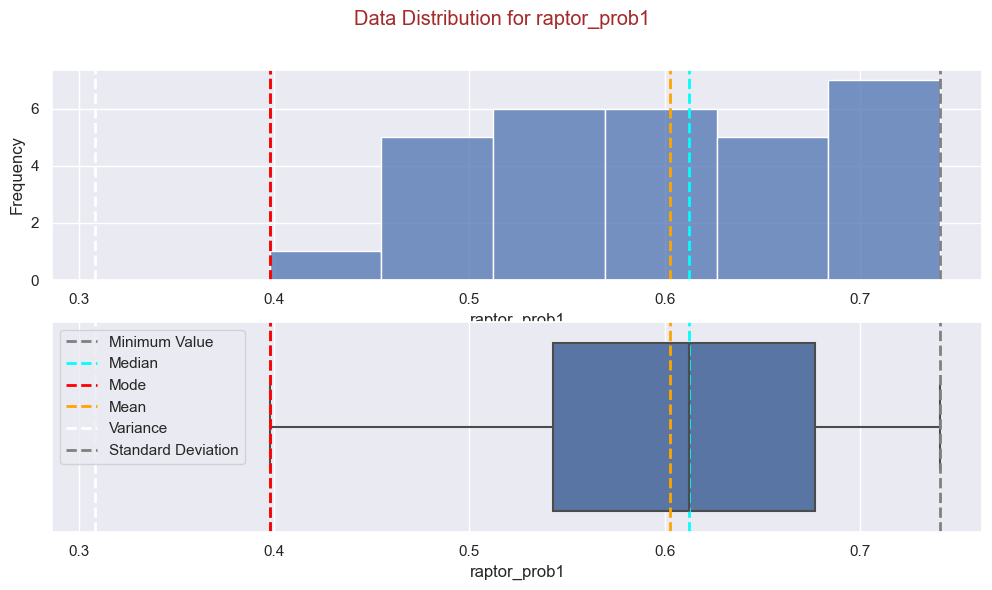

The statistical values are as follows:
 Minimum value:0.26
 Maximum value: 0.60
 Mode: 0.26 
 Mean: 0.40 
 Standard Deviation: 0.09 
 Variance: 0.31 
 Median: 0.39


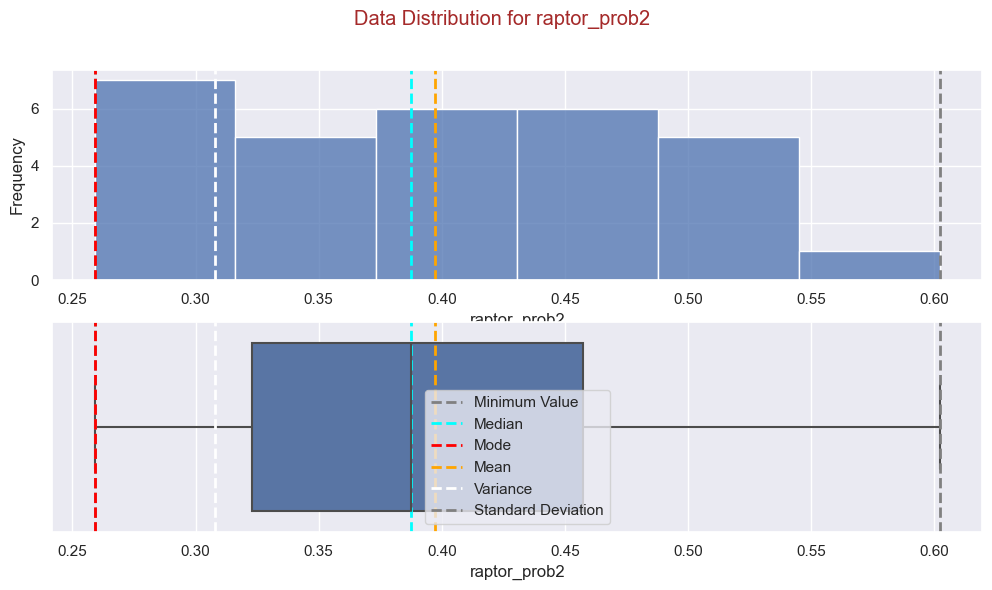

The statistical values are as follows:
 Minimum value:55.00
 Maximum value: 170.00
 Mode: 76.00 
 Mean: 117.47 
 Standard Deviation: 30.97 
 Variance: 5.57 
 Median: 117.00


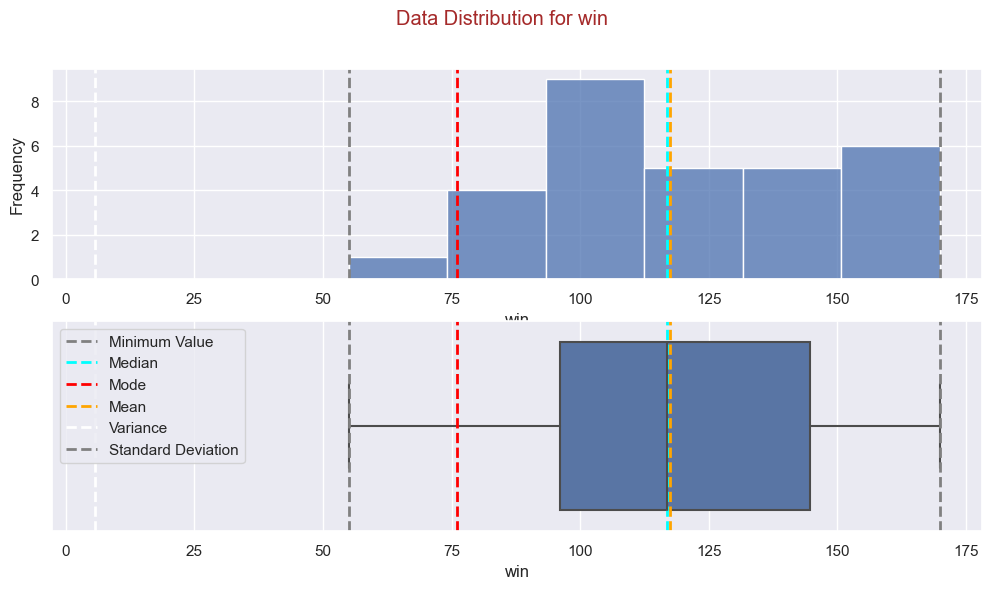

The statistical values are as follows:
 Minimum value:59.00
 Maximum value: 137.00
 Mode: 64.00 
 Mean: 91.77 
 Standard Deviation: 19.33 
 Variance: 4.40 
 Median: 90.00


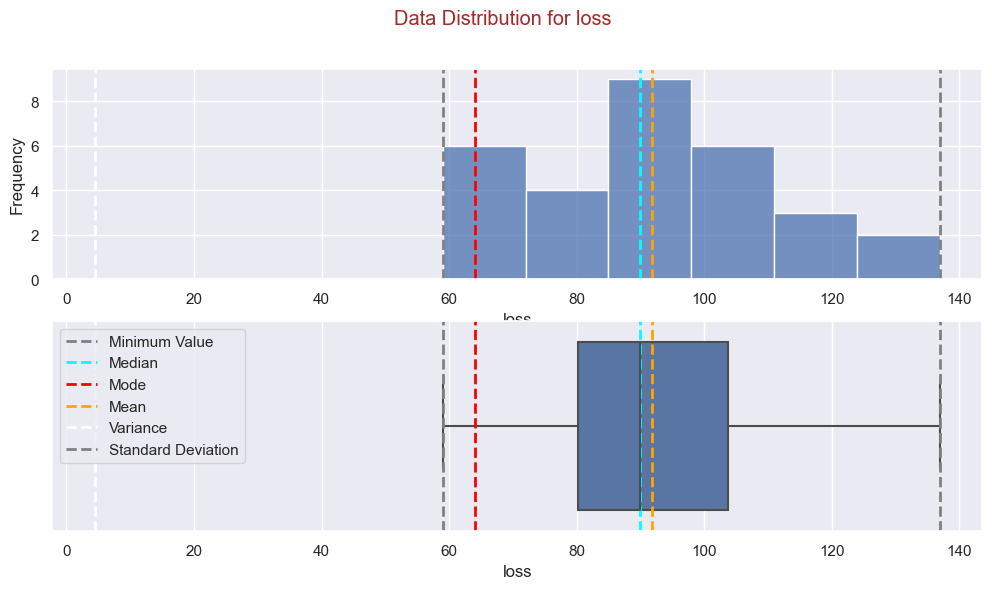

In [19]:
for col in team_summary:
    if (col != "team") & (col != "Alias"):
        show_distribution(team_summary[col], col)

***
># NBA RAPTOR Data
***
`This section consist of data concatenation of the NBA RAPTOR data with some visualisations`

In [20]:
nba_raptor_by_player1 = pd.read_csv(files[2], index_col=False)
nba_raptor_by_player1

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
19155,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
19156,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
19157,Ivica Zubac,zubaciv01,2021,3908,1910,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623


In [21]:
nba_raptor_by_player1.tail(10)

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
19149,Ante Zizic,zizican01,2018,498,237,0.667371,-0.807604,-0.140233,0.315256,0.315792,-0.000536,-0.561121,-1.747444,-2.308565,0.236041
19150,Ante Zizic,zizican01,2019,2240,1082,-2.073401,-0.690914,-2.764315,-0.007877,-0.007877,0.000000,-2.392563,-2.024149,-4.416713,-0.331493
19151,Ante Zizic,zizican01,2020,468,221,-2.525090,-0.593045,-3.118135,-0.041255,-0.041255,0.000000,-2.915056,-1.772787,-4.687843,-0.625340
19152,Jim Zoet,zoetji01,1983,67,30,-10.304482,0.747930,-9.556552,-0.106102,-0.106102,0.000000,-9.727965,0.652095,-9.075870,1.923928
19153,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,-3.533604,-2.932103,-6.465707,0.644128
19154,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
19155,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
19156,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
19157,Ivica Zubac,zubaciv01,2021,3908,1910,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623
19158,Ivica Zubac,zubaciv01,2022,3786,1852,-0.693765,0.723358,0.029594,2.626958,2.626958,0.000000,-1.134139,1.759848,0.625709,0.020823


In [22]:
len(nba_raptor_by_player1[nba_raptor_by_player1["player_name"] == "Ivica Zubac"])

6

In [23]:
nba_raptor_by_player1.player_name.value_counts().head(20)

Eddie Johnson       27
Mike Dunleavy       26
Vince Carter        22
John Lucas          22
Charles Jones       21
Kevin Garnett       21
Gerald Henderson    21
Robert Parish       21
Dirk Nowitzki       21
Kevin Willis        21
Jamal Crawford      20
Kobe Bryant         20
Moses Malone        19
John Stockton       19
Charles Oakley      19
James Edwards       19
Shaquille O'Neal    19
LeBron James        19
Tyson Chandler      19
Juwan Howard        19
Name: player_name, dtype: int64

In [24]:
nba_raptor_by_player2 = pd.read_csv(files[4], index_col=False)
nba_raptor_by_player2

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2023,2328,1140,-2.442459,0.605968,-1.836491,1.583854,-3.756532,-2.172678,-1.771180,-0.283673,-2.054852,0.400488,0.400488,0.000000,-1.867986,-0.182806,-2.050792,-0.956065
1,Steven Adams,adamsst01,2023,2391,1133,-0.539149,4.174473,3.635324,4.196019,0.186159,4.382178,0.416279,3.550985,3.967264,3.892111,3.892111,0.000000,0.025097,3.570024,3.595120,0.237905
2,Bam Adebayo,adebaba01,2023,6933,3448,-1.905568,2.343398,0.437830,1.584151,2.634869,4.219020,-1.279140,2.528053,1.248914,7.035148,5.692164,1.342984,-0.809324,2.539526,1.730202,-0.443789
3,Ochai Agbaji,agbajoc01,2023,2604,1209,-1.323938,-2.198396,-3.522334,0.637793,-0.569349,0.068445,-1.010696,-1.964927,-2.975622,-0.139469,-0.139469,0.000000,-1.145865,-2.506387,-3.652252,0.216216
4,Santi Aldama,aldamsa01,2023,3824,1783,-1.022699,-0.407462,-1.430161,-0.169196,-1.337527,-1.506723,-0.907095,-0.675487,-1.582582,1.058655,1.159520,-0.100866,-1.245487,-0.165475,-1.410962,-0.035690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Thaddeus Young,youngth01,2023,1642,795,-1.676276,0.902197,-0.774079,-2.849650,-2.873149,-5.722799,-2.048536,0.155497,-1.893039,0.348919,0.348919,0.000000,-1.652834,1.012841,-0.639993,0.385635
537,Trae Young,youngtr01,2023,6020,2771,5.777631,-1.040471,4.737160,-0.108236,-0.287141,-0.395376,4.871940,-0.925286,3.946654,9.767050,9.121716,0.645334,5.375346,-1.720146,3.655200,3.000059
538,Omer Yurtseven,yurtsom01,2023,212,99,0.061112,-7.201143,-7.140032,2.697151,-4.393875,-1.696724,0.607970,-7.089558,-6.481588,-0.190396,-0.095551,-0.094845,0.069578,-6.208725,-6.139147,0.268438
539,Cody Zeller,zelleco01,2023,801,391,-2.844900,-3.861700,-6.706600,0.774588,-2.275713,-1.501125,-2.271127,-3.793705,-6.064831,-0.667251,-0.488714,-0.178537,-2.305684,-3.094797,-5.400481,0.312224


In [25]:
nba_raptor_by_player2.tail(10)

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
531,James Wiseman,wisemja01,2023,1829,867,-3.762451,-3.966160,-7.728611,-3.630905,-5.016440,-8.647345,-3.915449,-4.390700,-8.306148,-2.458143,-2.458143,0.000000,-3.403488,-4.146504,-7.549991,0.061690
532,Christian Wood,woodch01,2023,3518,1738,0.376838,-0.177544,0.199294,0.184313,-3.045736,-2.861423,0.329350,-0.761358,-0.432008,2.051788,2.051788,0.000000,0.693407,-1.065276,-0.371870,-0.178704
533,Delon Wright,wrighde01,2023,2530,1221,0.901651,3.681013,4.582664,1.243784,1.664353,2.908137,1.029986,3.497378,4.527363,4.474904,4.474904,0.000000,0.970569,4.067846,5.038415,-1.303792
534,McKinley Wright IV,wrighmc01,2023,700,335,-2.246626,-0.192219,-2.438846,-6.857699,-4.113032,-10.970730,-3.368489,-0.994204,-4.362692,-0.273216,-0.273216,0.000000,-4.051351,-1.850018,-5.901370,-0.886378
535,Gabe York,yorkga01,2023,118,56,-0.667032,0.734384,0.067352,7.624883,1.768757,9.393641,1.037718,1.046157,2.083875,0.138805,0.138805,0.000000,1.917097,2.128934,4.046031,0.508323
536,Thaddeus Young,youngth01,2023,1642,795,-1.676276,0.902197,-0.774079,-2.849650,-2.873149,-5.722799,-2.048536,0.155497,-1.893039,0.348919,0.348919,0.000000,-1.652834,1.012841,-0.639993,0.385635
537,Trae Young,youngtr01,2023,6020,2771,5.777631,-1.040471,4.737160,-0.108236,-0.287141,-0.395376,4.871940,-0.925286,3.946654,9.767050,9.121716,0.645334,5.375346,-1.720146,3.655200,3.000059
538,Omer Yurtseven,yurtsom01,2023,212,99,0.061112,-7.201143,-7.140032,2.697151,-4.393875,-1.696724,0.607970,-7.089558,-6.481588,-0.190396,-0.095551,-0.094845,0.069578,-6.208725,-6.139147,0.268438
539,Cody Zeller,zelleco01,2023,801,391,-2.844900,-3.861700,-6.706600,0.774588,-2.275713,-1.501125,-2.271127,-3.793705,-6.064831,-0.667251,-0.488714,-0.178537,-2.305684,-3.094797,-5.400481,0.312224
540,Ivica Zubac,zubaciv01,2023,4721,2300,-2.461412,2.429430,-0.031982,0.189055,-2.287532,-2.098477,-2.062918,1.589006,-0.473912,2.665541,2.150220,0.515322,-2.522289,1.882625,-0.639664,-0.578707


In [26]:
nba_raptor_by_player2.player_name.nunique()

541

In [27]:
nba_raptor_by_player2.player_name.value_counts().head(20)

Precious Achiuwa    1
Larry Nance Jr.     1
Josh Okogie         1
Chuma Okeke         1
Jordan Nwora        1
Jusuf Nurkic        1
Kendrick Nunn       1
Frank Ntilikina     1
Jaylen Nowell       1
Nerlens Noel        1
Zeke Nnaji          1
Daishen Nix         1
Georges Niang       1
Raul Neto           1
Aaron Nesmith       1
Andrew Nembhard     1
Svi Mykhailiuk      1
Isaac Okoro         1
Mike Muscala        1
Keegan Murray       1
Name: player_name, dtype: int64

In [28]:
nba_raptor_by_player3 = pd.read_csv(files[6], index_col=False)
nba_raptor_by_player3

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,-4.275564,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,-1.341421,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,-4.970491,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,1.415548,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,Ivica Zubac,zubaciv01,2018,871,410,-2.581325,1.643240,-0.938084,-3.444739,6.249652,2.804914,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
4681,Ivica Zubac,zubaciv01,2019,2345,1079,-2.336006,1.400274,-0.935733,-1.757992,3.051059,1.293067,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
4682,Ivica Zubac,zubaciv01,2020,3447,1646,0.516422,3.529428,4.045850,3.314971,2.963001,6.277972,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
4683,Ivica Zubac,zubaciv01,2021,3908,1910,-0.371753,2.960613,2.588860,-2.541995,0.156338,-2.385657,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623


In [29]:
nba_raptor_by_player3.player_name.nunique()

1322

In [30]:
nba_raptor_by_player3.player_name.value_counts().head(20)

Nicolas Batum               9
Jeff Green                  9
Chris Paul                  9
Mason Plumlee               9
Kyle Lowry                  9
Bismack Biyombo             9
Kevin Love                  9
Otto Porter Jr.             9
Kentavious Caldwell-Pope    9
Maurice Harkless            9
Robin Lopez                 9
James Harden                9
Patrick Beverley            9
Tim Hardaway Jr.            9
Blake Griffin               9
Austin Rivers               9
Brook Lopez                 9
Eric Gordon                 9
Bradley Beal                9
Robert Covington            9
Name: player_name, dtype: int64

In [31]:
nba_raptor_by_player1.shape, nba_raptor_by_player2.shape, nba_raptor_by_player3.shape

((19159, 15), (541, 21), (4685, 21))

In [32]:
nba_raptor_by_player = pd.concat([nba_raptor_by_player1, nba_raptor_by_player2, nba_raptor_by_player3])
nba_raptor_by_player

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266,NaN,NaN,NaN,NaN,NaN,NaN
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152,NaN,NaN,NaN,NaN,NaN,NaN
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576,-2.581325,1.643240,-0.938084,-3.444739,6.249652,2.804914
4681,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074,-2.336006,1.400274,-0.935733,-1.757992,3.051059,1.293067
4682,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164,0.516422,3.529428,4.045850,3.314971,2.963001,6.277972
4683,Ivica Zubac,zubaciv01,2021,3908,1910,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623,-0.371753,2.960613,2.588860,-2.541995,0.156338,-2.385657


In [33]:
nba_raptor_by_player.groupby("player_name")['mp', "poss"].value_counts().sum()

24385

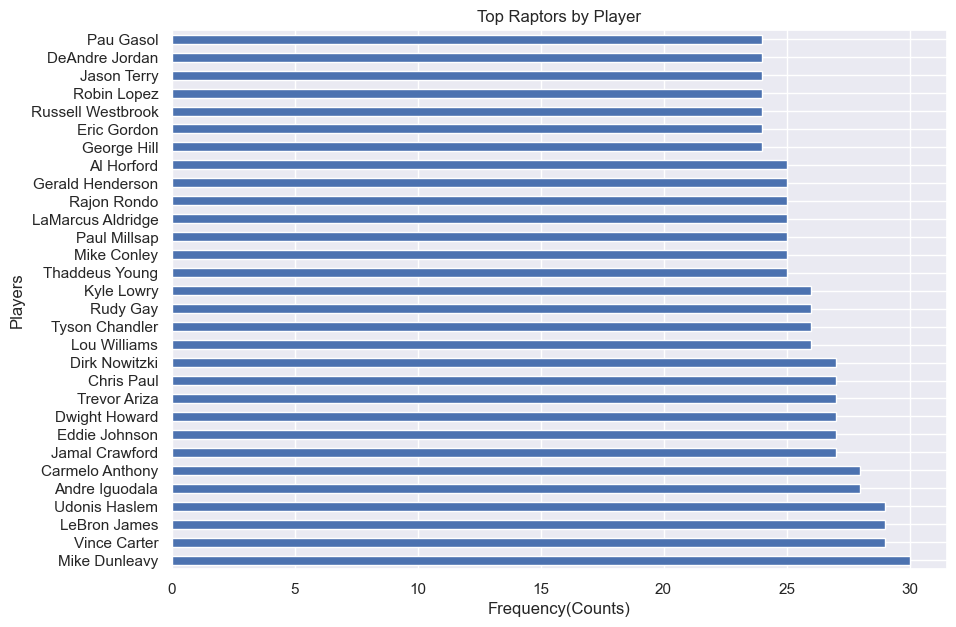

In [34]:
nba_raptor_by_player.player_name.value_counts().sort_values(ascending=False).head(30).plot(kind="barh", figsize=(10,7), title="Top Raptors by Player")
plt.xlabel("Frequency(Counts)")
plt.ylabel("Players")
plt.show()

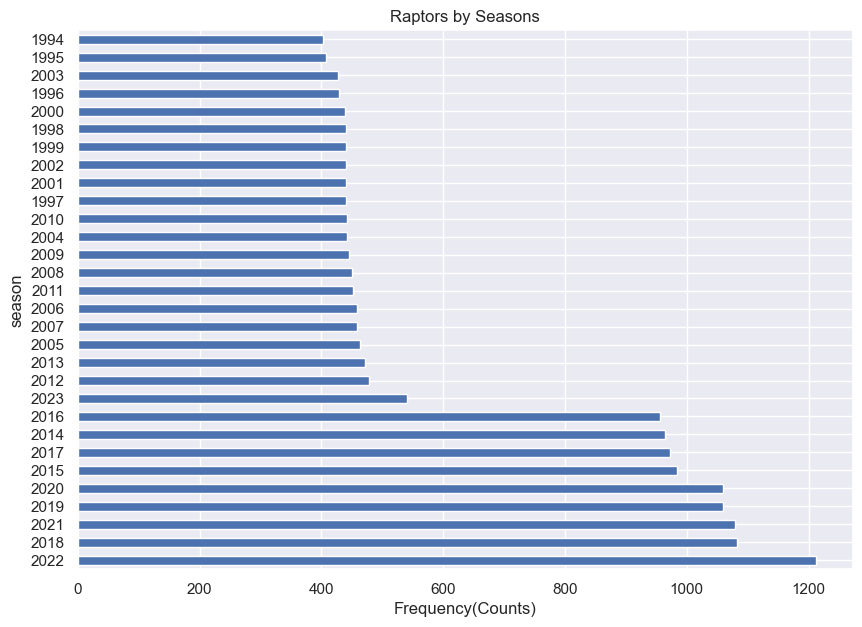

In [35]:
nba_raptor_by_player.season.value_counts().sort_values(ascending=False).head(30).plot(kind="barh", figsize=(10,7), title="Raptors by Seasons")
plt.xlabel("Frequency(Counts)")
plt.ylabel("season")
plt.show()

In [36]:
player_col = list(nba_raptor_by_player.columns)
player_col

['player_name',
 'player_id',
 'season',
 'poss',
 'mp',
 'raptor_offense',
 'raptor_defense',
 'raptor_total',
 'war_total',
 'war_reg_season',
 'war_playoffs',
 'predator_offense',
 'predator_defense',
 'predator_total',
 'pace_impact',
 'raptor_box_offense',
 'raptor_box_defense',
 'raptor_box_total',
 'raptor_onoff_offense',
 'raptor_onoff_defense',
 'raptor_onoff_total']

In [37]:
player_col.remove("season")
print(player_col)

['player_name', 'player_id', 'poss', 'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season', 'war_playoffs', 'predator_offense', 'predator_defense', 'predator_total', 'pace_impact', 'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total', 'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total']


In [38]:
nba_raptor_unique_player = nba_raptor_by_player.groupby("player_name")[player_col].mean()
nba_raptor_unique_player.tail(30)

,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
player_name,,,,,,,,,,,,,,,,,,
Yi Jianlian,2329.600000,1208.600000,-3.871638,-0.508710,-4.380349,-0.830544,-0.837096,0.006551,-3.681278,-0.755263,-4.436541,0.055978,NaN,NaN,NaN,NaN,NaN,NaN
Yinka Dare,482.250000,250.500000,-13.588343,-2.252459,-15.840802,-0.686700,-0.686700,0.000000,-12.635921,-1.847724,-14.483645,2.384149,NaN,NaN,NaN,NaN,NaN,NaN
Yogi Ferrell,2157.600000,1045.400000,-0.296967,0.449001,0.152035,1.384136,1.390295,-0.006158,-0.573147,-0.111139,-0.684286,-0.866083,0.039408,0.114466,0.153874,-1.683562,1.653345,-0.030217
Yuta Tabuse,34.000000,17.000000,-0.644543,-2.552242,-3.196785,-0.003772,-0.003772,0.000000,-1.452880,-4.539060,-5.991940,-2.438167,NaN,NaN,NaN,NaN,NaN,NaN
Yuta Watanabe,907.111111,427.444444,-2.457063,0.038336,-2.418726,0.100477,0.140456,-0.039979,-2.698173,-0.633495,-3.331668,-0.152662,-2.361625,0.053627,-2.307997,-1.542993,0.115106,-1.427887
Yves Pons,155.000000,71.000000,-5.827352,-0.979321,-6.806673,-0.147032,-0.147032,0.000000,-4.272150,-3.351126,-7.623276,0.055996,-2.920832,-1.759246,-4.680078,-15.810185,2.752822,-13.057362
Yvon Joseph,11.000000,5.000000,2.586189,-2.996214,-0.410024,0.005998,0.005998,0.000000,0.841409,-2.668921,-1.827511,0.502733,NaN,NaN,NaN,NaN,NaN,NaN
Zabian Dowdell,581.000000,292.000000,-3.627781,-0.030992,-3.658773,-0.135979,-0.135979,0.000000,-3.161976,-0.179163,-3.341140,0.407016,NaN,NaN,NaN,NaN,NaN,NaN
Zach Collins,1973.777778,946.333333,-2.269612,0.024738,-2.244874,0.139976,0.085131,0.054845,-2.612951,0.095002,-2.517950,-0.008511,-2.663674,0.252088,-2.411586,0.393864,-0.294431,0.099433


In [39]:
nba_raptor_unique_player[nba_raptor_unique_player.index == "Udonis Haslem"]

,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
player_name,,,,,,,,,,,,,,,,,,
Udonis Haslem,1809.0,947.724138,-3.367277,1.396515,-1.970762,0.170026,0.095705,0.074321,-3.046,0.68179,-2.36421,-0.389104,-3.679749,2.866916,-0.812833,-5.926648,-0.2667,-6.193347


* NBA RAPTOR by team

In [40]:
nba_raptor_by_team1 = pd.read_csv(files[3], index_col=False)
nba_raptor_by_team2 = pd.read_csv(files[5], index_col=False)
nba_raptor_by_team3 = pd.read_csv(files[7], index_col=False)

nba_raptor_by_team = pd.concat([nba_raptor_by_team1, nba_raptor_by_team2, nba_raptor_by_team3])
nba_raptor_by_team.shape, nba_raptor_by_team1.shape, nba_raptor_by_team2.shape, nba_raptor_by_team3.shape

((38091, 23), (29976, 17), (826, 23), (7289, 23))

In [41]:
nba_raptor_by_team[nba_raptor_by_team.season >= 2020].head(20)

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
87,Precious Achiuwa,achiupr01,2021,PO,MIA,24,12,-19.524216,16.885365,-2.638851,0.000721,0.000000,0.000721,-14.239813,7.007386,-7.232427,2.725036,NaN,NaN,NaN,NaN,NaN,NaN
88,Precious Achiuwa,achiupr01,2021,RS,MIA,1557,737,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.000000,-3.657064,0.374133,-3.282930,0.292227,NaN,NaN,NaN,NaN,NaN,NaN
89,Precious Achiuwa,achiupr01,2022,PO,TOR,320,167,-2.531130,-0.755062,-3.286191,-0.046953,0.000000,-0.046953,-3.958067,-0.451657,-4.409724,-0.340793,NaN,NaN,NaN,NaN,NaN,NaN
90,Precious Achiuwa,achiupr01,2022,RS,TOR,3482,1725,-2.516108,2.410593,-0.105515,2.309611,2.309611,0.000000,-2.348484,2.251909,-0.096575,-0.764250,NaN,NaN,NaN,NaN,NaN,NaN
137,Jaylen Adams,adamsja01,2020,PO,POR,43,21,6.207690,7.656298,13.863988,0.180289,0.000000,0.180289,3.989698,3.511923,7.501621,-1.784967,NaN,NaN,NaN,NaN,NaN,NaN
138,Jaylen Adams,adamsja01,2021,RS,MIL,41,18,-16.826146,-1.405129,-18.231275,-0.139591,-0.139591,0.000000,-12.863840,-4.114459,-16.978299,-1.834433,NaN,NaN,NaN,NaN,NaN,NaN
169,Steven Adams,adamsst01,2020,PO,OKC,442,210,-2.446397,1.635348,-0.811049,0.212952,0.000000,0.212952,-4.509713,-0.883482,-5.393196,-0.605597,NaN,NaN,NaN,NaN,NaN,NaN
170,Steven Adams,adamsst01,2020,RS,OKC,3522,1680,0.662443,1.660176,2.322620,4.329823,4.329823,0.000000,0.049831,1.948630,1.998460,-0.425098,NaN,NaN,NaN,NaN,NaN,NaN
171,Steven Adams,adamsst01,2021,RS,NOP,3313,1605,-0.542297,1.044021,0.501724,2.630392,2.630392,0.000000,-0.728367,1.333237,0.604871,-1.226775,NaN,NaN,NaN,NaN,NaN,NaN
172,Steven Adams,adamsst01,2022,PO,MEM,245,114,1.708276,-2.408183,-0.699908,0.123000,0.000000,0.123000,0.620153,-2.926976,-2.306824,0.016895,NaN,NaN,NaN,NaN,NaN,NaN


***
># NBA Historical Data
***
`This section consist of data concatenation of the NBA Historical data with some visualisations`

In [42]:
nba_historical = pd.read_csv(files[9])
nba_historical

,player_id,name_common,year_id,type,age,team_id,pos,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Pace +/-
0,youngtr01,Trae Young,2020,RS,21,ATL,PG,NaN,ATL,60,2120,NaN,35.3,NaN,59.5,NaN,NaN,NaN,NaN,7.1,-3.3,3.7,7.19,NaN,NaN,34.9,45.6,16.2,1.6,11.5,6.5,1.4,0.3,NaN,NaN,NaN,NaN,NaN,NaN,45.5,44.8,2.9
1,huntede01,De'Andre Hunter,2020,RS,22,ATL,SF,NaN,ATL,63,2018,NaN,32.0,NaN,52.1,NaN,NaN,NaN,NaN,-2.5,-1.3,-3.8,-1.09,NaN,NaN,17.5,8.0,12.1,2.3,13.1,7.6,1.0,0.7,NaN,NaN,NaN,NaN,NaN,NaN,44.5,21.1,0.0
2,huertke01,Kevin Huerter,2020,RS,21,ATL,SG,NaN,ATL,56,1760,NaN,31.4,NaN,53.6,NaN,NaN,NaN,NaN,-0.4,-2.4,-2.8,-0.05,NaN,NaN,17.1,17.5,12.0,2.1,12.0,7.0,1.4,1.3,NaN,NaN,NaN,NaN,NaN,NaN,54.8,10.5,0.1
3,reddica01,Cam Reddish,2020,RS,20,ATL,SF,NaN,ATL,58,1551,NaN,26.7,NaN,50.0,NaN,NaN,NaN,NaN,-2.9,0.0,-3.0,-0.18,NaN,NaN,18.9,8.0,13.6,2.4,12.7,7.5,1.9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,45.1,22.7,0.9
4,collijo01,John Collins,2020,RS,22,ATL,PF,NaN,ATL,41,1363,NaN,33.2,NaN,65.9,NaN,NaN,NaN,NaN,0.0,-0.4,-0.4,1.65,NaN,NaN,22.7,7.6,10.1,9.0,24.0,16.4,1.1,4.1,NaN,NaN,NaN,NaN,NaN,NaN,24.3,24.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28174,wrighla01,Larry Wright,1977,PO,22,WSB,PG,NaN,WAS,8,104,NaN,13.0,NaN,54.9,NaN,NaN,NaN,NaN,0.0,1.2,1.2,0.22,NaN,NaN,0.0,22.9,0.0,1.0,5.9,3.5,3.2,0.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,53.8,1.4
28175,bingda01,Dave Bing,1977,PO,33,WSB,SG,NaN,WAS,8,55,NaN,6.9,NaN,47.4,NaN,NaN,NaN,NaN,-1.3,-3.2,-4.5,-0.05,NaN,NaN,0.0,15.2,0.0,5.9,5.5,5.7,0.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.5,-0.5
28176,grayle01,Leonard Gray,1977,PO,25,WSB,PF,NaN,WAS,8,52,NaN,6.5,NaN,28.6,NaN,NaN,NaN,NaN,-9.2,-0.2,-9.4,-0.18,NaN,NaN,0.0,2.6,0.0,4.1,13.7,9.0,1.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.8
28177,weissbo01,Bob Weiss,1977,PO,34,WSB,PG,NaN,WAS,4,34,NaN,8.5,NaN,55.1,NaN,NaN,NaN,NaN,-2.4,-1.0,-3.4,-0.01,NaN,NaN,0.0,7.7,0.0,3.2,6.0,4.6,1.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,0.8


In [43]:
nba_historical.tail(10)

,player_id,name_common,year_id,type,age,team_id,pos,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Pace +/-
28169,unselwe01,Wes Unseld,1977,PO,30,WSB,C,NaN,WAS,9,368,NaN,40.9,NaN,56.5,NaN,NaN,NaN,NaN,0.9,1.5,2.4,0.98,NaN,NaN,0.0,15.5,0.0,7.0,22.4,14.9,1.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,22.2,-0.5
28170,cheniph01,Phil Chenier,1977,PO,26,WSB,SG,NaN,WAS,9,360,NaN,40.0,NaN,52.7,NaN,NaN,NaN,NaN,1.7,1.1,2.8,1.05,NaN,NaN,0.0,10.6,0.0,2.4,9.0,5.8,2.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.6,-0.5
28171,hendeto01,Tom Henderson,1977,PO,25,WSB,PG,NaN,WAS,9,322,NaN,35.8,NaN,49.3,NaN,NaN,NaN,NaN,1.5,-0.3,1.2,0.67,NaN,NaN,0.0,27.8,0.0,2.7,3.8,3.2,1.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,33.3,-0.4
28172,kupchmi01,Mitch Kupchak,1977,PO,22,WSB,C,NaN,WAS,9,252,NaN,28.0,NaN,63.0,NaN,NaN,NaN,NaN,2.5,-0.9,1.6,0.58,NaN,NaN,0.0,6.2,0.0,12.0,16.1,14.1,0.4,0.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,65.6,0.2
28173,greveke01,Kevin Grevey,1977,PO,23,WSB,SF,NaN,WAS,9,225,NaN,25.0,NaN,44.3,NaN,NaN,NaN,NaN,-2.7,-1.5,-4.2,-0.17,NaN,NaN,0.0,5.1,0.0,4.8,2.7,3.7,0.4,1.1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.1,-0.2
28174,wrighla01,Larry Wright,1977,PO,22,WSB,PG,NaN,WAS,8,104,NaN,13.0,NaN,54.9,NaN,NaN,NaN,NaN,0.0,1.2,1.2,0.22,NaN,NaN,0.0,22.9,0.0,1.0,5.9,3.5,3.2,0.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,53.8,1.4
28175,bingda01,Dave Bing,1977,PO,33,WSB,SG,NaN,WAS,8,55,NaN,6.9,NaN,47.4,NaN,NaN,NaN,NaN,-1.3,-3.2,-4.5,-0.05,NaN,NaN,0.0,15.2,0.0,5.9,5.5,5.7,0.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.5,-0.5
28176,grayle01,Leonard Gray,1977,PO,25,WSB,PF,NaN,WAS,8,52,NaN,6.5,NaN,28.6,NaN,NaN,NaN,NaN,-9.2,-0.2,-9.4,-0.18,NaN,NaN,0.0,2.6,0.0,4.1,13.7,9.0,1.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.8
28177,weissbo01,Bob Weiss,1977,PO,34,WSB,PG,NaN,WAS,4,34,NaN,8.5,NaN,55.1,NaN,NaN,NaN,NaN,-2.4,-1.0,-3.4,-0.01,NaN,NaN,0.0,7.7,0.0,3.2,6.0,4.6,1.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,0.8
28178,riordmi01,Mike Riordan,1977,PO,31,WSB,SF,NaN,WAS,2,8,NaN,4.0,NaN,0.0,NaN,NaN,NaN,NaN,-11.3,-1.9,-13.2,-0.04,NaN,NaN,0.0,14.6,0.0,0.0,25.4,13.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.3


In [44]:
nba_historical.isnull().sum()

player_id         0
name_common       0
year_id           0
type              0
age               0
team_id           0
pos               0
tmRtg          8690
franch_id         0
G                 0
Min               0
MP%            8690
MPG               0
P/36           8690
TS%               0
A/36           8690
R/36           8690
SB/36          8690
TO/36          8690
Raptor O          0
Raptor D          0
Raptor+/-         0
Raptor WAR        2
PIE%           8690
AWS%           8690
USG%              0
AST%              0
TOV%              0
ORB%              0
DRB%              0
TRB%              0
STL%              0
BLK%              0
ORtg           8690
%Pos           8690
DRtg           8690
2P%            8690
3P%            8690
FT%            8690
3PAr              0
FTAr              0
Pace +/-          2
dtype: int64

In [45]:
nba_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28179 entries, 0 to 28178
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    28179 non-null  object 
 1   name_common  28179 non-null  object 
 2   year_id      28179 non-null  int64  
 3   type         28179 non-null  object 
 4   age          28179 non-null  int64  
 5   team_id      28179 non-null  object 
 6   pos          28179 non-null  object 
 7   tmRtg        19489 non-null  float64
 8   franch_id    28179 non-null  object 
 9   G            28179 non-null  int64  
 10  Min          28179 non-null  int64  
 11  MP%          19489 non-null  float64
 12  MPG          28179 non-null  float64
 13  P/36         19489 non-null  float64
 14  TS%          28179 non-null  float64
 15  A/36         19489 non-null  float64
 16  R/36         19489 non-null  float64
 17  SB/36        19489 non-null  float64
 18  TO/36        19489 non-null  float64
 19  Rapt

In [46]:
nba = pd.read_table(files[10], delimiter="	")
nba

,team,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Hawks,0.50659,0.51033,0.51500,0.51631,0.51853,0.52819,0.53316,0.52887,0.53559,0.53979,0.54406,0.55059,0.55654,0.54819,0.55298,0.54751,0.54967,0.56089,0.55626,0.57457,0.58205,0.57947,0.58893,0.60811,0.60994,0.61638,0.62932,0.64055,0.63623,0.64583,0.65302,0.66626,0.66367,0.68585,0.68545,0.68699,0.69889,0.70126,0.70873,0.71627,0.73074,0.74168,0.76403,0.78034,0.78955,0.79571,0.81632,0.83095,0.80556
1,Nets,0.50290,0.50561,0.50916,0.51488,0.51580,0.51226,0.52629,0.51997,0.52036,0.52213,0.51841,0.51452,0.52263,0.52271,0.52445,0.51666,0.51149,0.50685,0.50886,0.50070,0.49120,0.48797,0.49266,0.48054,0.47683,0.48004,0.47737,0.46924,0.46477,0.44831,0.43876,0.43952,0.43324,0.42479,0.42033,0.41381,0.41389,0.40248,0.39898,0.40743,0.41453,0.42484,0.42403,0.44106,0.43498,0.40266,0.39979,0.41820,0.42308
2,Celtics,0.50072,0.50446,0.49667,0.49552,0.49248,0.49178,0.48757,0.48156,0.46489,0.46445,0.47876,0.47318,0.47261,0.46916,0.46707,0.47046,0.47751,0.48152,0.48073,0.47784,0.48687,0.49569,0.49009,0.47899,0.48000,0.48011,0.47825,0.45737,0.45678,0.45645,0.45256,0.45059,0.44908,0.44359,0.45642,0.44919,0.44770,0.45029,0.42788,0.41242,0.40990,0.39759,0.41533,0.42298,0.41764,0.43214,0.39493,0.39146,0.41176
3,Hornets,0.49680,0.49290,0.49334,0.48998,0.48366,0.48375,0.48789,0.48325,0.47458,0.48458,0.48490,0.49089,0.49287,0.50169,0.49620,0.49915,0.49421,0.48753,0.48754,0.50236,0.51023,0.50381,0.50926,0.50743,0.49746,0.48863,0.48544,0.49565,0.50162,0.49451,0.49507,0.49436,0.48523,0.48351,0.48134,0.48476,0.48863,0.47121,0.48139,0.46885,0.46520,0.46380,0.44927,0.45589,0.44461,0.44333,0.42749,0.40301,0.40196
4,Bulls,0.49521,0.49411,0.49999,0.49727,0.48183,0.47770,0.47760,0.48167,0.48419,0.48618,0.48480,0.49344,0.49283,0.49677,0.49644,0.48745,0.49440,0.49709,0.48573,0.48591,0.48437,0.47389,0.47672,0.47557,0.48612,0.48850,0.48056,0.49230,0.50045,0.51178,0.52817,0.52104,0.51034,0.52609,0.52024,0.51742,0.51572,0.50736,0.52464,0.53731,0.54208,0.55070,0.55343,0.53974,0.54905,0.55394,0.58889,0.62055,0.63889
5,Cavaliers,0.50632,0.51001,0.51559,0.52810,0.53398,0.54561,0.54552,0.55888,0.55277,0.54415,0.55025,0.55111,0.56327,0.56692,0.55869,0.56267,0.56710,0.57342,0.57485,0.57301,0.56152,0.56491,0.57316,0.56286,0.55653,0.55273,0.55315,0.54710,0.55056,0.53978,0.53865,0.52611,0.52965,0.53040,0.54139,0.55032,0.54464,0.55441,0.57112,0.57235,0.56008,0.56128,0.56917,0.57688,0.57877,0.57560,0.57393,0.59438,0.59091
6,Mavericks,0.50057,0.50490,0.51062,0.50779,0.51322,0.52419,0.52018,0.54108,0.53991,0.52999,0.54006,0.53523,0.54855,0.54649,0.55093,0.55558,0.56100,0.56053,0.56216,0.56531,0.56828,0.57012,0.56965,0.56925,0.56526,0.56238,0.56082,0.55886,0.55001,0.55091,0.54678,0.55349,0.55153,0.55213,0.54834,0.54339,0.55417,0.55846,0.55719,0.56590,0.55897,0.55617,0.56061,0.57536,0.58625,0.58613,0.61335,0.60975,0.60909
7,Nuggets,0.50629,0.50851,0.50099,0.49103,0.48811,0.48260,0.48959,0.48520,0.47546,0.47896,0.48877,0.47794,0.47637,0.47038,0.46176,0.46352,0.46024,0.45025,0.44176,0.43789,0.44057,0.42985,0.42929,0.42715,0.43103,0.43263,0.43248,0.43800,0.43453,0.43716,0.43410,0.43216,0.44052,0.45119,0.44041,0.43495,0.43038,0.42277,0.43772,0.43321,0.43965,0.43666,0.42163,0.42695,0.41269,0.40941,0.41547,0.38464,0.39623
8,Pistons,0.49966,0.49987,0.50095,0.49052,0.49260,0.48822,0.48644,0.49065,0.49435,0.49669,0.49470,0.49174,0.47564,0.48764,0.48807,0.47976,0.47946,0.48168,0.48260,0.47669,0.47653,0.47778,0.46992,0.47590,0.46515,0.45806,0.45361,0.44857,0.44535,0.45902,0.46223,0.45579,0.46032,0.45684,0.45124,0.45617,0.45587,0.46334,0.44568,0.43682,0.43357,0.42028,0.41708,0.39904,0.40774,0.39549,0.38524,0.37677,0.39815
9,Warriors,0.50006,0.50266,0.51470,0.52206,0.52458,0.52631,0.54101,0.54760,0.55366,0.55795,0.55746,0.55488,0.55876,0.56085,0.57054,0.58213,0.59007,0.60556,0.60989,0.62727,0.63749,0.63914,0.65809,0.67216,0.67476,0.69282,0.69281,0.70103,0.69819

In [47]:
avg = nba.mean(axis=1)
data = pd.DataFrame({"team": nba["team"], "win_prob_avg":avg.values})
data

,team,win_prob_avg
0,Hawks,0.629218
1,Nets,0.470244
2,Celtics,0.459653
3,Hornets,0.481449
4,Bulls,0.510336
5,Cavaliers,0.554787
6,Mavericks,0.553692
7,Nuggets,0.448348
8,Pistons,0.460928
9,Warriors,0.657109


In [48]:
team_summary.head(10)

,team,score1,score2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,win,loss
0,ATL,116.976190,114.490476,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240,122,88
1,BOS,115.245833,108.204167,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977,160,80
2,BRK,112.886256,110.654028,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458,121,90
3,CHI,111.579487,110.712821,1469.032866,1511.286566,0.574517,0.425483,1467.443871,1512.875560,1460.233095,1503.130909,0.553235,0.446765,100,95
4,CHO,109.173684,112.731579,1445.200474,1504.790798,0.552041,0.447959,1440.972582,1509.018690,1397.798650,1493.135932,0.490776,0.509224,76,114
5,CLE,109.836634,108.004950,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542,113,89
6,DAL,113.104265,109.862559,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847,123,88
7,DEN,115.863248,109.452991,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560,170,64
8,DET,108.895833,113.567708,1365.128557,1505.127145,0.443881,0.556119,1362.044399,1508.211303,1318.514590,1490.139047,0.397708,0.602292,55,137
9,GSW,115.444954,110.096330,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587,149,69


In [49]:
# creating aliases
aliases = {
    'PHI': '76ers',
    'LAL': 'Lakers',
    'WAS': 'Wizards',
    'ORL': 'Magic',
    'HOU': 'Rockets',
    'NYK': 'Knicks',
    'CHI': 'Bulls',
    'NOP': 'Pelicans',
    'CLE': 'Cavaliers',
    'CHO': 'Hornets',
    'OKC': 'Thunder',
    'DEN': 'Nuggets',
    'DAL': 'Mavericks',
    'POR': 'Trail Blazers',
    'MIL': 'Bucks',
    'LAC': 'Clippers',
    'SAS': 'Spurs',
    'DET': 'Pistons',
    'TOR': 'Raptors',
    'BOS': 'Celtics',
    'UTA': 'Jazz',
    'MEM': 'Grizzlies',
    'PHO': 'Suns',
    'MIN': 'Timberwolves',
    'SAC': 'Kings',
    'IND': 'Pacers',
    'BRK': 'Nets',
    'GSW': 'Warriors',
    'ATL': 'Hawks',
    'MIA': 'Heat'
}


# Create the 'Alias' column
team_summary['Alias'] = team_summary['team'].map(aliases)

In [50]:
team_summary.rename(columns={"Alias": "team", "team": "Alias"}, inplace=True)
team_summary

,Alias,score1,score2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,win,loss,team
0,ATL,116.976190,114.490476,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240,122,88,Hawks
1,BOS,115.245833,108.204167,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977,160,80,Celtics
2,BRK,112.886256,110.654028,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458,121,90,Nets
3,CHI,111.579487,110.712821,1469.032866,1511.286566,0.574517,0.425483,1467.443871,1512.875560,1460.233095,1503.130909,0.553235,0.446765,100,95,Bulls
4,CHO,109.173684,112.731579,1445.200474,1504.790798,0.552041,0.447959,1440.972582,1509.018690,1397.798650,1493.135932,0.490776,0.509224,76,114,Hornets
5,CLE,109.836634,108.004950,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542,113,89,Cavaliers
6,DAL,113.104265,109.862559,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847,123,88,Mavericks
7,DEN,115.863248,109.452991,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560,170,64,Nuggets
8,DET,108.895833,113.567708,1365.128557,1505.127145,0.443881,0.556119,1362.044399,1508.211303,1318.514590,1490.139047,0.397708,0.602292,55,137,Pistons
9,GSW,115.444954,110.096330,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587,149,69,Warriors


In [51]:
team_summary = team_summary[['team', 'Alias', 'score1', 'score2', 'elo1_pre', 'elo2_pre',
                             'elo_prob1', 'elo_prob2', 'elo1_post','elo2_post', 'raptor1_pre', 'raptor2_pre', 
                             'raptor_prob1', 'raptor_prob2', 'win', 'loss']]
team_summary

,team,Alias,score1,score2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,win,loss
0,Hawks,ATL,116.976190,114.490476,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240,122,88
1,Celtics,BOS,115.245833,108.204167,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977,160,80
2,Nets,BRK,112.886256,110.654028,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458,121,90
3,Bulls,CHI,111.579487,110.712821,1469.032866,1511.286566,0.574517,0.425483,1467.443871,1512.875560,1460.233095,1503.130909,0.553235,0.446765,100,95
4,Hornets,CHO,109.173684,112.731579,1445.200474,1504.790798,0.552041,0.447959,1440.972582,1509.018690,1397.798650,1493.135932,0.490776,0.509224,76,114
5,Cavaliers,CLE,109.836634,108.004950,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542,113,89
6,Mavericks,DAL,113.104265,109.862559,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847,123,88
7,Nuggets,DEN,115.863248,109.452991,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560,170,64
8,Pistons,DET,108.895833,113.567708,1365.128557,1505.127145,0.443881,0.556119,1362.044399,1508.211303,1318.514590,1490.139047,0.397708,0.602292,55,137
9,Warriors,GSW,115.444954,110.096330,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587,149,69


In [52]:
merged_data = pd.merge(team_summary, data, on="team")
merged_data

,team,Alias,score1,score2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,win,loss,win_prob_avg
0,Hawks,ATL,116.976190,114.490476,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240,122,88,0.629218
1,Celtics,BOS,115.245833,108.204167,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977,160,80,0.459653
2,Nets,BRK,112.886256,110.654028,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458,121,90,0.470244
3,Bulls,CHI,111.579487,110.712821,1469.032866,1511.286566,0.574517,0.425483,1467.443871,1512.875560,1460.233095,1503.130909,0.553235,0.446765,100,95,0.510336
4,Hornets,CHO,109.173684,112.731579,1445.200474,1504.790798,0.552041,0.447959,1440.972582,1509.018690,1397.798650,1493.135932,0.490776,0.509224,76,114,0.481449
5,Cavaliers,CLE,109.836634,108.004950,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542,113,89,0.554787
6,Mavericks,DAL,113.104265,109.862559,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847,123,88,0.553692
7,Nuggets,DEN,115.863248,109.452991,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560,170,64,0.448348
8,Pistons,DET,108.895833,113.567708,1365.128557,1505.127145,0.443881,0.556119,1362.044399,1508.211303,1318.514590,1490.139047,0.397708,0.602292,55,137,0.460928
9,Warriors,GSW,115.444954,110.096330,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587,149,69,0.657109


In [53]:
# create Conference
df = create_conference(merged_data)
df.head(10)

,team,Alias,Conference,score1,score2,win,loss,win_prob_avg,win_rate,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2
0,Hawks,ATL,E,116.976190,114.490476,122,88,0.629218,64.076048,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240
1,Celtics,BOS,E,115.245833,108.204167,160,80,0.459653,74.102324,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977
2,Nets,BRK,E,112.886256,110.654028,121,90,0.470244,62.254188,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458
3,Bulls,CHI,E,111.579487,110.712821,100,95,0.510336,55.323480,1469.032866,1511.286566,0.574517,0.425483,1467.443871,1512.875560,1460.233095,1503.130909,0.553235,0.446765
4,Hornets,CHO,E,109.173684,112.731579,76,114,0.481449,49.077552,1445.200474,1504.790798,0.552041,0.447959,1440.972582,1509.018690,1397.798650,1493.135932,0.490776,0.509224
5,Cavaliers,CLE,E,109.836634,108.004950,113,89,0.554787,56.545809,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542
6,Mavericks,DAL,W,113.104265,109.862559,123,88,0.553692,70.015280,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847
7,Nuggets,DEN,W,115.863248,109.452991,170,64,0.448348,74.043977,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560
8,Pistons,DET,E,108.895833,113.567708,55,137,0.460928,39.770827,1365.128557,1505.127145,0.443881,0.556119,1362.044399,1508.211303,1318.514590,1490.139047,0.397708,0.602292
9,Warriors,GSW,W,115.444954,110.096330,149,69,0.657109,60.841312,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587


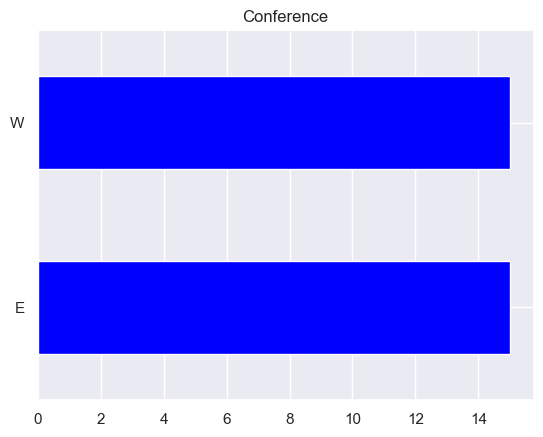

In [54]:
df.Conference.value_counts().plot(kind="barh", title="Conference", color="blue");

The statistical values are as follows:
 Minimum value:39.77
 Maximum value: 74.10
 Mode: 39.77 
 Mean: 60.26 
 Standard Deviation: 9.49 
 Variance: 3.08 
 Median: 61.27


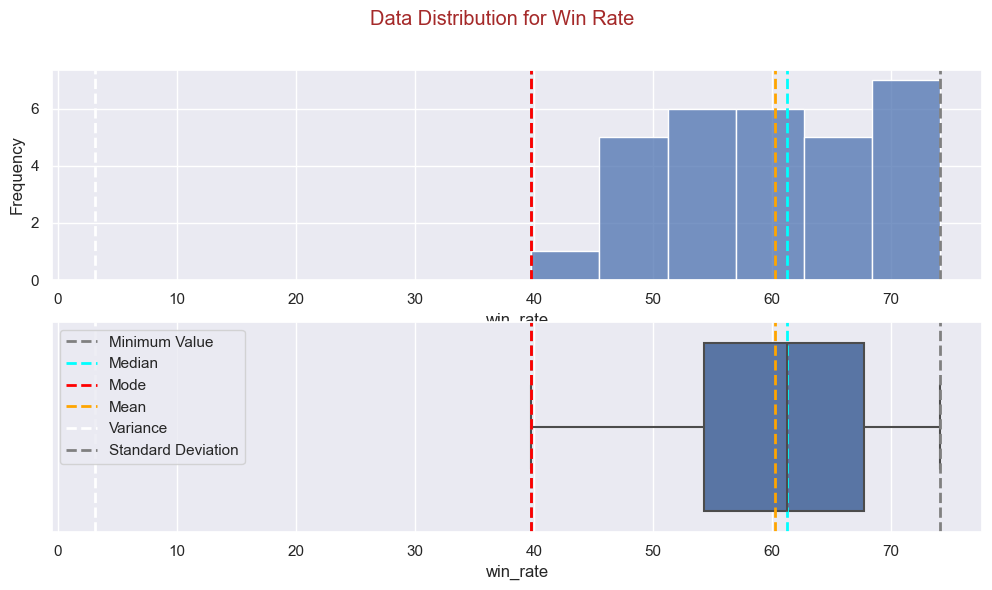

In [55]:
show_distribution(df.win_rate, "Win Rate")

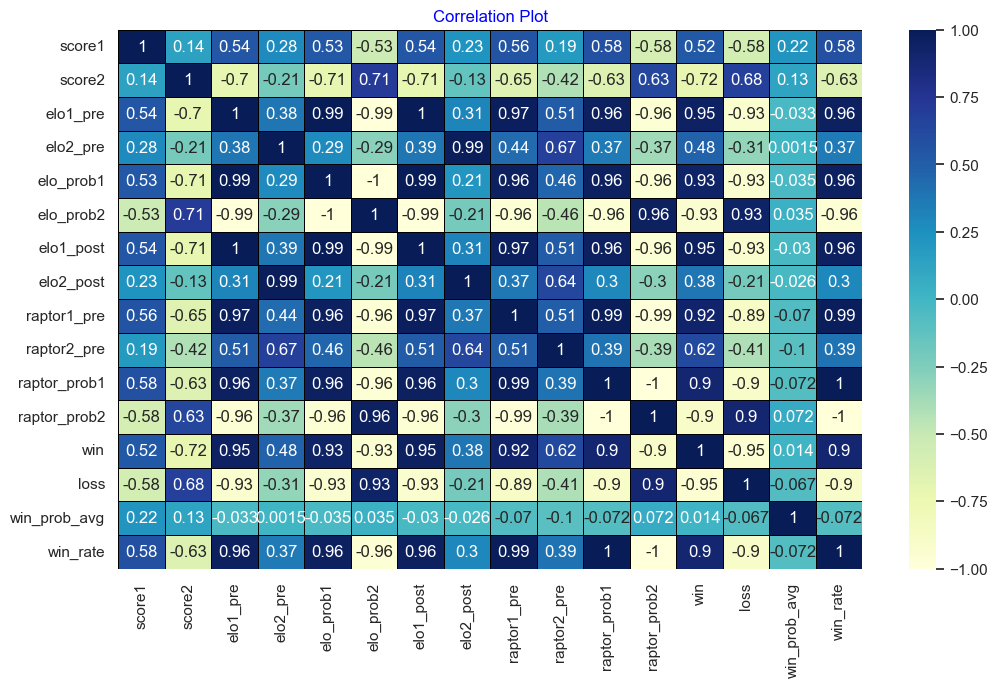

In [56]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(merged_data.corr(), annot=True, cmap="YlGnBu", linecolor="black", linewidths=.5,ax=ax)
plt.title("Correlation Plot", color="blue")
plt.show()

***
># NBA DRAYMOND Data
***
`This section consist of data concatenation of the NBA DRAYMOND data with some visualisations`

In [57]:
nba_draymond = pd.read_csv(files[0])
nba_draymond

,season,player,possessions,DRAYMOND
0,2017,AJ Hammons,331.025800,-0.176680
1,2014,AJ Price,211.715600,5.912172
2,2015,AJ Price,633.518600,-1.790921
3,2014,Aaron Brooks,3257.934000,-0.952900
4,2015,Aaron Brooks,3984.044000,-0.186127
...,...,...,...,...
3004,2019,Zaza Pachulia,1891.814000,1.235672
3005,2019,Zhaire Smith,252.540800,0.050301
3006,2018,Zhou Qi,277.535800,2.325245
3007,2019,Zhou Qi,3.141458,-2.437187


In [58]:
nba_draymond.player.nunique()

974

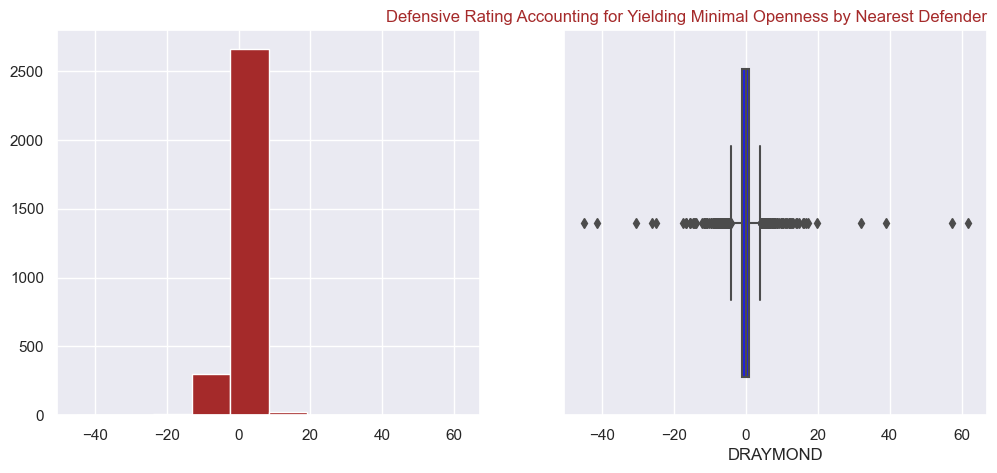

In [59]:
#visualisation of the defensive rating accounting for yielding minimal openess
fig, ax = plt.subplots(1,2,figsize=(12, 5) )
nba_draymond.DRAYMOND.hist(ax=ax[0], color="brown")
sns.boxplot(nba_draymond.DRAYMOND, ax=ax[1], color="blue")
plt.title(
    "Defensive Rating Accounting for Yielding Minimal Openness by Nearest Defender",
    loc="right",
    color="brown"
);

***
># NBA Player Data
***
This section consist of data concatenation of the NBA Player data with some visualisations

`The column headers in the dataset  represents the statistics and information related to NBA basketball players and their performance during a specific season. Here's a breakdown of what these column headers mean:`

1. **ID**: A unique identifier for each record or player.

2. **Season**: The NBA season to which the data corresponds. This is typically represented as a year range, e.g., "2020-2021."

3. **Player**: The name or identifier of the NBA player.

4. **Pos**: The player's position on the basketball court (e.g., PG for Point Guard, SG for Shooting Guard, SF for Small Forward, PF for Power Forward, C for Center).

5. **Age**: The player's age during the specified season.

6. **Team**: The NBA team that the player is a part of during that season.

7. **G**: Games played by the player during the season.

8. **GS**: Games started by the player during the season.

9. **MP**: Minutes played by the player during the season.

10. **FG**: Field Goals made by the player during the season.

11. **FGA**: Field Goals attempted by the player during the season.

12. **FG%**: Field Goal Percentage, which is the ratio of successful field goals made to attempted field goals.

13. **3P**: Three-Point Field Goals made by the player during the season.

14. **3PA**: Three-Point Field Goals attempted by the player during the season.

15. **3P%**: Three-Point Field Goal Percentage, which is the ratio of successful three-point field goals made to attempted three-point field goals.

16. **2P**: Two-Point Field Goals made by the player during the season.

17. **2PA**: Two-Point Field Goals attempted by the player during the season.

18. **2P%**: Two-Point Field Goal Percentage, which is the ratio of successful two-point field goals made to attempted two-point field goals.

19. **eFG%**: Effective Field Goal Percentage, a more comprehensive measure of shooting efficiency that accounts for the added value of three-point shots.

20. **FT**: Free Throws made by the player during the season.

21. **FTA**: Free Throws attempted by the player during the season.

22. **FT%**: Free Throw Percentage, which is the ratio of successful free throws made to attempted free throws.

23. **ORB**: Offensive Rebounds grabbed by the player during the season.

24. **DRB**: Defensive Rebounds grabbed by the player during the season.

25. **TRB**: Total Rebounds, which is the sum of offensive and defensive rebounds.

26. **AST**: Assists made by the player during the season.

27. **STL**: Steals made by the player during the season.

28. **BLK**: Blocks made by the player during the season.

29. **TOV**: Turnovers committed by the player during the season.

30. **PF**: Personal Fouls committed by the player during the season.

31. **PTS**: Total Points scored by the player during the season.

These columns provide a comprehensive set of statistics and information about each NBA player's performance in a given season, and they are often used for various analyses and evaluations in the basketball.

In [60]:
player_data = wrangle_player_data("C:/Users/DELL/Project/FreeWorks/NBA  Project/data/NBA Player Stats(1950 - 2022).csv")[1]
player_data

,Season,Player,Pos,Age,team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORB_per_game,DRB_per_game,TRB_per_game,AST_per_game,STL_per_game,BLK_per_game,TOV_per_game,PF_per_game,PTS_per_game,FG%_per_game,3P%_per_game,Rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
80,2022,Mikal Bridges,SF,25.0,PHO,82.0,82.0,2854.0,458.0,858.0,0.534,115.0,312.0,0.369,343.0,546.0,0.628,0.601,131.0,157.0,0.834,74.0,273.0,347.0,185.0,96.0,36.0,68.0,150.0,1162.0,0.025929,0.095655,0.121584,0.064821,0.033637,0.012614,0.023826,0.052558,0.407148,0.000187,0.000129,86
81,2022,Miles Bridges,PF,23.0,CHO,80.0,80.0,2837.0,596.0,1214.0,0.491,154.0,465.0,0.331,442.0,749.0,0.590,0.554,267.0,333.0,0.802,90.0,469.0,559.0,300.0,74.0,67.0,150.0,193.0,1613.0,0.031724,0.165315,0.197039,0.105746,0.026084,0.023616,0.052873,0.068030,0.568558,0.000173,0.000117,100
173,2022,DeMar DeRozan,PF,32.0,CHI,76.0,76.0,2743.0,774.0,1535.0,0.504,50.0,142.0,0.352,724.0,1393.0,0.520,0.521,520.0,593.0,0.877,56.0,336.0,392.0,374.0,68.0,24.0,181.0,178.0,2118.0,0.020416,0.122494,0.142909,0.136347,0.024790,0.008750,0.065986,0.064892,0.772147,0.000184,0.000128,100
734,2022,Jayson Tatum,SF,23.0,BOS,76.0,76.0,2731.0,708.0,1564.0,0.453,230.0,651.0,0.353,478.0,913.0,0.524,0.526,400.0,469.0,0.853,85.0,524.0,609.0,334.0,75.0,49.0,217.0,174.0,2046.0,0.031124,0.191871,0.222995,0.122300,0.027462,0.017942,0.079458,0.063713,0.749176,0.000166,0.000129,100
60,2022,Saddiq Bey,SF,22.0,DET,82.0,82.0,2704.0,450.0,1136.0,0.396,211.0,610.0,0.346,239.0,526.0,0.454,0.489,210.0,254.0,0.827,107.0,334.0,441.0,233.0,73.0,16.0,96.0,128.0,1321.0,0.039571,0.123521,0.163092,0.086169,0.026997,0.005917,0.035503,0.047337,0.488536,0.000146,0.000128,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2022,Joe Johnson,SG,40.0,BOS,1.0,0.0,2.0,1.0,1.0,1.000,0.0,0.0,0.000,1.0,1.0,1.000,1.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,65
382,2022,DeJon Jarreau,SG,24.0,IND,1.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65
128,2022,Ahmad Caver,SG,25.0,IND,1.0,0.0,1.0,1.0,1.0,1.000,0.0,0.0,0.000,1.0,1.0,1.000,1.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,65


The statistical values are as follows:
 Minimum value:1.00
 Maximum value: 82.00
 Mode: 2.00 
 Mean: 43.04 
 Standard Deviation: 25.82 
 Variance: 5.08 
 Median: 48.00


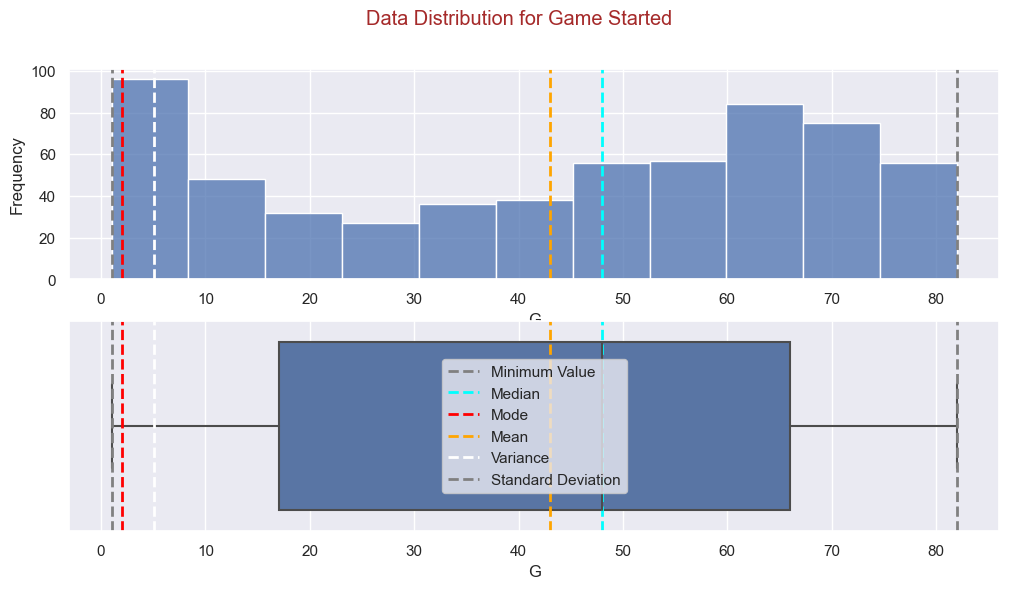

In [61]:
show_distribution(player_data["G"], "Game Started")

The statistical values are as follows:
 Minimum value:53.00
 Maximum value: 100.00
 Mode: 65.00 
 Mean: 70.46 
 Standard Deviation: 11.80 
 Variance: 3.43 
 Median: 66.00


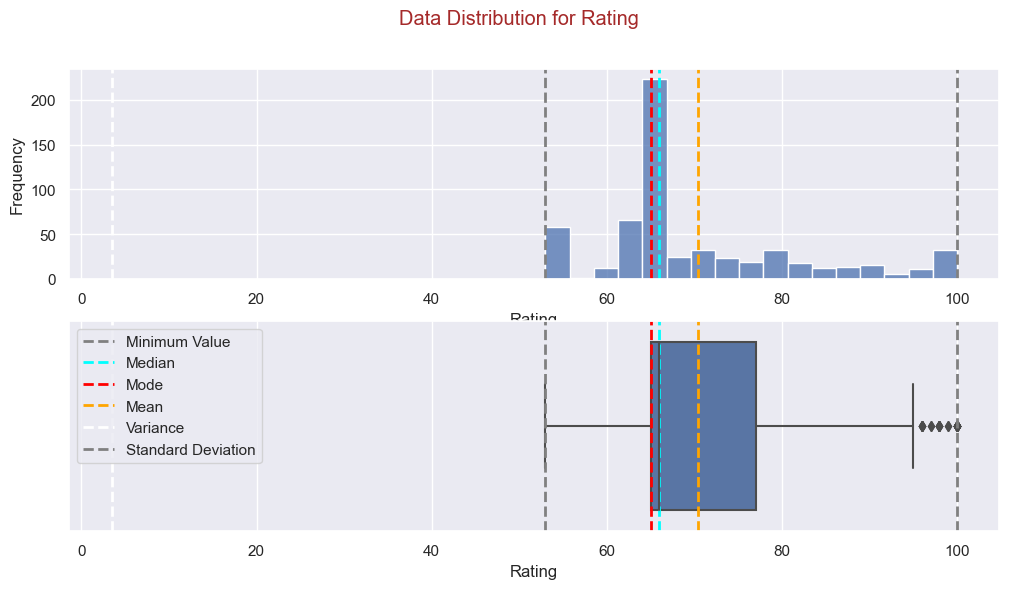

In [62]:
show_distribution(player_data.Rating, "Rating")

In [63]:
pd.set_option("display.max_rows", None)
rating_data = player_data[["Player","Age", "Pos", "MP","ORB", "DRB", "TRB", "AST", "BLK", "TOV", "PF", "PTS", "Rating"]].sort_values(
    by="Rating",
    ascending=False
)
rating_data.head(70)

,Player,Age,Pos,MP,ORB,DRB,TRB,AST,BLK,TOV,PF,PTS,Rating
ID,,,,,,,,,,,,,
33,LaMelo Ball,20.0,PG,2422.0,108.0,393.0,501.0,571.0,30.0,245.0,237.0,1508.0,100
640,Julius Randle,27.0,PF,2544.0,125.0,591.0,716.0,370.0,39.0,245.0,205.0,1447.0,100
545,Ja Morant,22.0,PG,1889.0,77.0,248.0,325.0,384.0,22.0,196.0,86.0,1564.0,100
72,Devin Booker,25.0,SG,2345.0,45.0,297.0,342.0,329.0,26.0,162.0,180.0,1822.0,100
292,James Harden,32.0,PG,2419.0,55.0,445.0,500.0,667.0,36.0,284.0,153.0,1432.0,100
623,Kristaps Porziņģis,26.0,PF,1481.0,102.0,309.0,411.0,119.0,84.0,81.0,137.0,1030.0,100
681,Dennis Schröder,28.0,SG-PG,1837.0,34.0,180.0,214.0,296.0,8.0,143.0,154.0,867.0,100
671,Domantas Sabonis,25.0,PF,2136.0,201.0,551.0,752.0,323.0,27.0,195.0,203.0,1171.0,100
263,Shai Gilgeous-Alexander,23.0,PG,1942.0,37.0,241.0,278.0,331.0,46.0,154.0,142.0,1371.0,100


In [64]:
rating_data[rating_data["Pos"] == "SF"].sort_values(by="Rating", ascending=False).head(10)

,Player,Age,Pos,MP,ORB,DRB,TRB,AST,BLK,TOV,PF,PTS,Rating
ID,,,,,,,,,,,,,
734,Jayson Tatum,23.0,SF,2731.0,85.0,524.0,609.0,334.0,49.0,217.0,174.0,2046.0,100
525,Khris Middleton,30.0,SF,2141.0,41.0,315.0,356.0,358.0,18.0,190.0,160.0,1325.0,99
368,Brandon Ingram,24.0,SF,1869.0,35.0,285.0,320.0,307.0,26.0,151.0,119.0,1246.0,98
110,Jimmy Butler,32.0,SF,1931.0,102.0,234.0,336.0,312.0,27.0,121.0,88.0,1219.0,98
96,Jaylen Brown,25.0,SF,2220.0,53.0,351.0,404.0,231.0,18.0,178.0,163.0,1559.0,97
262,Josh Giddey,19.0,SF,1700.0,98.0,323.0,421.0,345.0,20.0,171.0,88.0,674.0,92
41,RJ Barrett,21.0,SF,2417.0,66.0,342.0,408.0,208.0,16.0,151.0,142.0,1402.0,92
811,Andrew Wiggins,26.0,SF,2329.0,85.0,240.0,325.0,161.0,51.0,111.0,158.0,1256.0,91
780,Franz Wagner,20.0,SF,2429.0,84.0,272.0,356.0,231.0,34.0,119.0,164.0,1197.0,91


In [65]:
player_data[player_data["Player"] == "LeBron James"]

,Season,Player,Pos,Age,team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORB_per_game,DRB_per_game,TRB_per_game,AST_per_game,STL_per_game,BLK_per_game,TOV_per_game,PF_per_game,PTS_per_game,FG%_per_game,3P%_per_game,Rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
381,2022,LeBron James,C,37.0,LAL,56.0,56.0,2084.0,640.0,1221.0,0.524,161.0,448.0,0.359,479.0,773.0,0.62,0.59,254.0,336.0,0.756,63.0,396.0,459.0,349.0,73.0,59.0,196.0,121.0,1695.0,0.03023,0.190019,0.22025,0.167466,0.035029,0.028311,0.09405,0.058061,0.81334,0.000251,0.000172,88


The statistical values are as follows:
 Minimum value:19.00
 Maximum value: 41.00
 Mode: 24.00 
 Mean: 25.75 
 Standard Deviation: 4.12 
 Variance: 2.03 
 Median: 25.00


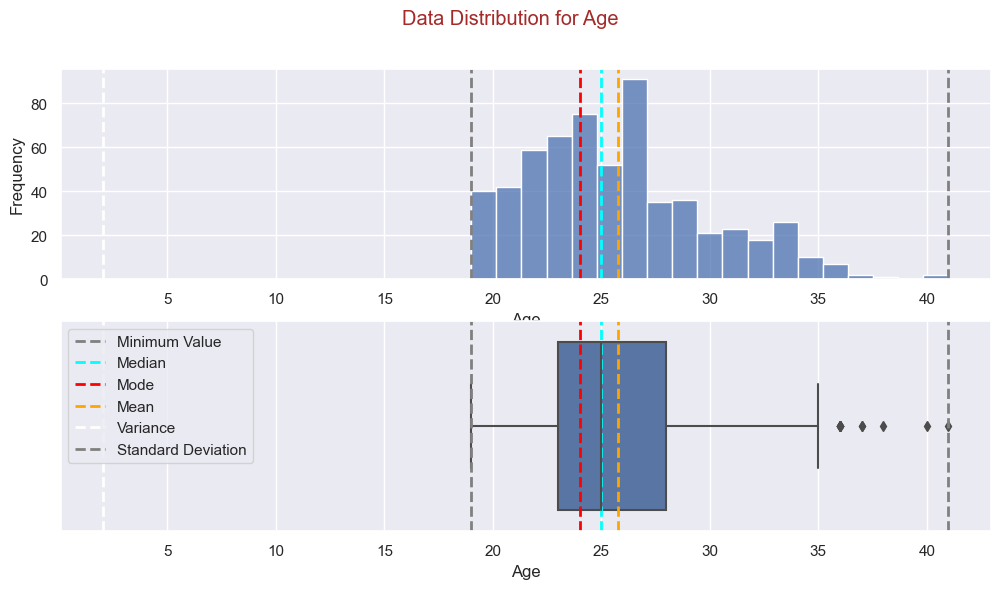

In [66]:
show_distribution(player_data["Age"], "Age")

The statistical values are as follows:
 Minimum value:1.00
 Maximum value: 82.00
 Mode: 2.00 
 Mean: 43.04 
 Standard Deviation: 25.82 
 Variance: 5.08 
 Median: 48.00


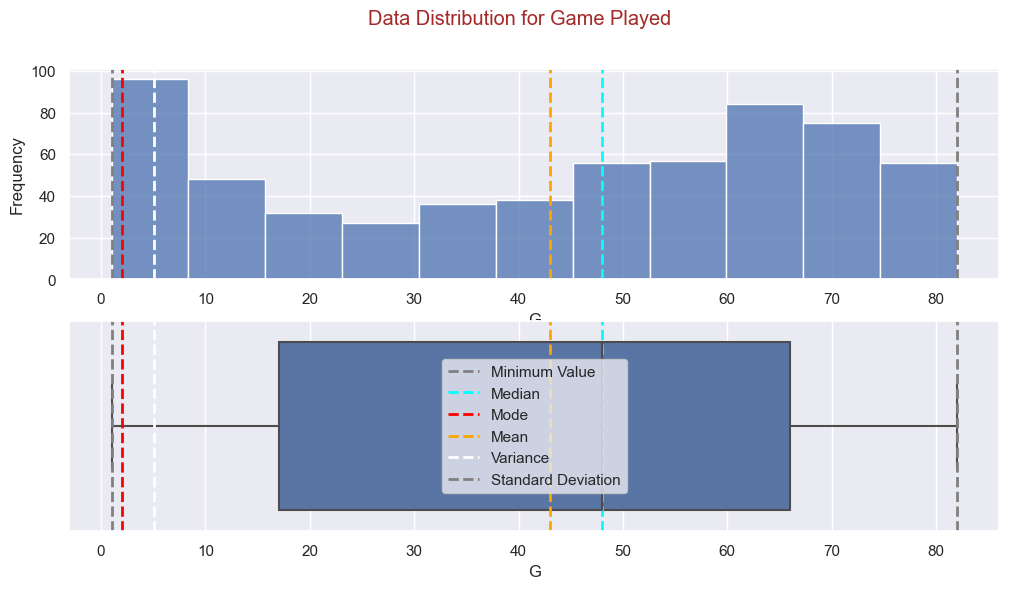

In [67]:
show_distribution(player_data["G"], "Game Played")

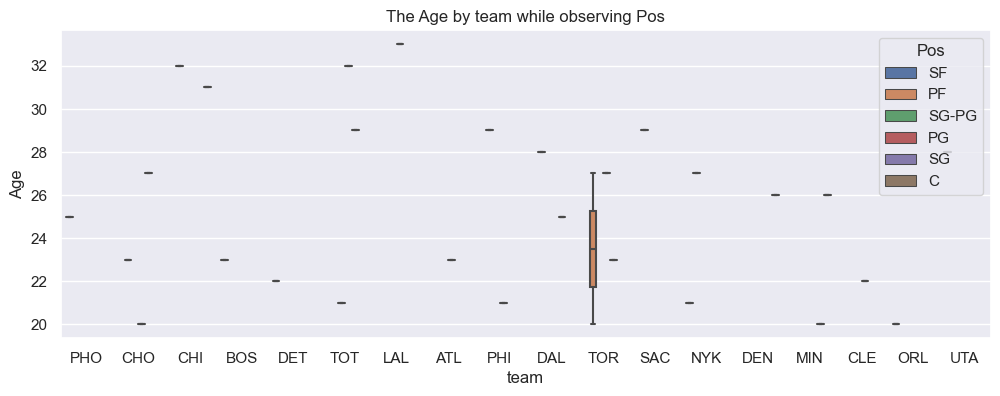

In [68]:
#show categories
show_category("team", "Age", player_data)

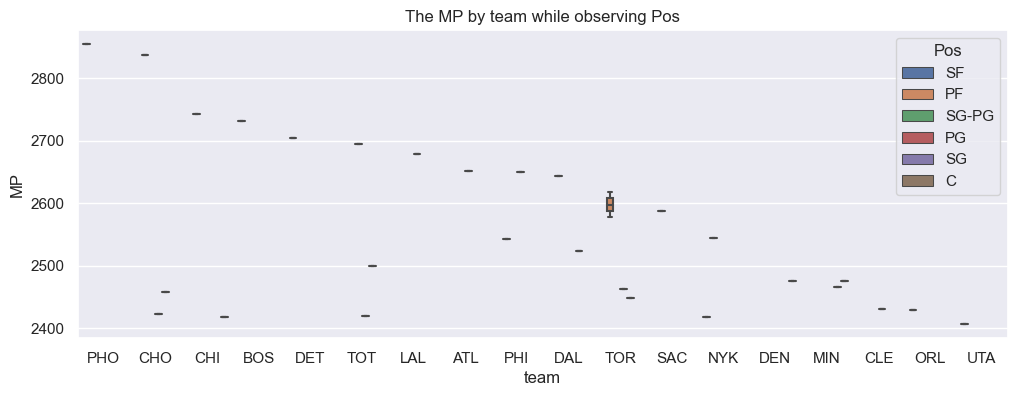

In [69]:
show_category("team", "MP",player_data)

***
>## Golden State Warriors
***

In [70]:
gsw_player_data = player_data[player_data.team == "GSW"]

nop = len(player_data[player_data.team == "GSW"])
print(f" The Golden State warriors had {nop} players in their team")

 The Golden State warriors had 16 players in their team


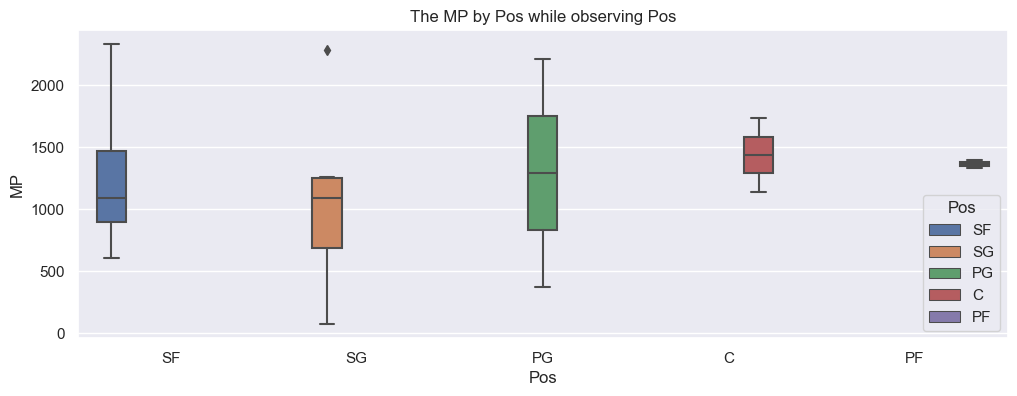

In [71]:
show_category("Pos", "MP", gsw_player_data)

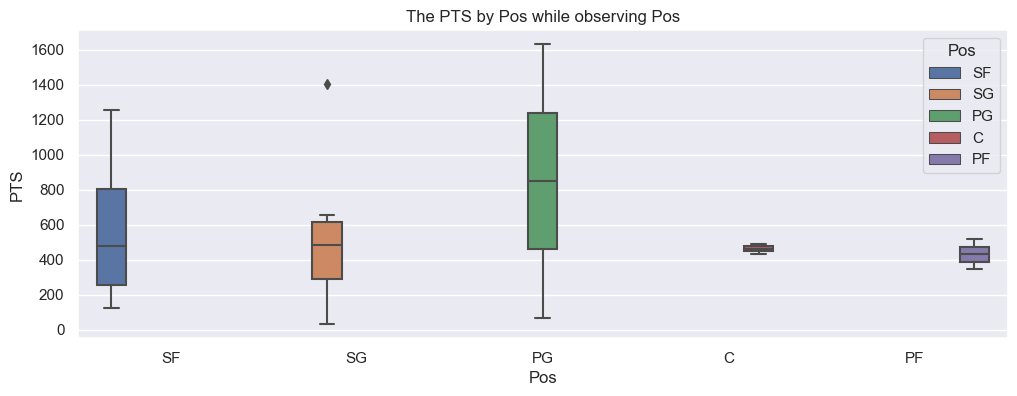

In [72]:
show_category("Pos", "PTS", gsw_player_data)

In [73]:
gsw_player_data.sort_values(by="Rating", ascending=False).head(10)

,Season,Player,Pos,Age,team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORB_per_game,DRB_per_game,TRB_per_game,AST_per_game,STL_per_game,BLK_per_game,TOV_per_game,PF_per_game,PTS_per_game,FG%_per_game,3P%_per_game,Rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
165,2022,Stephen Curry,PG,33.0,GSW,64.0,64.0,2211.0,535.0,1224.0,0.437,285.0,750.0,0.380,250.0,474.0,0.527,0.554,275.0,298.0,0.923,34.0,301.0,335.0,404.0,85.0,23.0,206.0,130.0,1630.0,0.015378,0.136137,0.151515,0.182723,0.038444,0.010403,0.093171,0.058797,0.737223,0.000198,0.000172,100
811,2022,Andrew Wiggins,SF,26.0,GSW,73.0,73.0,2329.0,475.0,1019.0,0.466,157.0,399.0,0.393,318.0,620.0,0.513,0.543,149.0,235.0,0.634,85.0,240.0,325.0,161.0,76.0,51.0,111.0,158.0,1256.0,0.036496,0.103049,0.139545,0.069128,0.032632,0.021898,0.047660,0.067840,0.539287,0.000200,0.000169,91
618,2022,Jordan Poole,SG,22.0,GSW,76.0,51.0,2283.0,474.0,1058.0,0.448,211.0,580.0,0.364,263.0,478.0,0.550,0.548,246.0,266.0,0.925,34.0,226.0,260.0,304.0,60.0,23.0,187.0,206.0,1405.0,0.014893,0.098993,0.113885,0.133158,0.026281,0.010074,0.081910,0.090232,0.615418,0.000196,0.000159,87
447,2022,Jonathan Kuminga,SF,19.0,GSW,70.0,12.0,1185.0,236.0,460.0,0.513,50.0,149.0,0.336,186.0,311.0,0.598,0.567,130.0,190.0,0.684,54.0,180.0,234.0,64.0,31.0,22.0,74.0,146.0,652.0,0.045570,0.151899,0.197468,0.054008,0.026160,0.018565,0.062447,0.123207,0.550211,0.000433,0.000284,76
621,2022,Otto Porter Jr.,PF,28.0,GSW,63.0,15.0,1396.0,193.0,416.0,0.464,80.0,216.0,0.370,113.0,200.0,0.565,0.560,49.0,61.0,0.803,86.0,276.0,362.0,94.0,68.0,29.0,37.0,83.0,515.0,0.061605,0.197708,0.259312,0.067335,0.048711,0.020774,0.026504,0.059456,0.368911,0.000332,0.000265,72
607,2022,Gary Payton II,SG,29.0,GSW,71.0,16.0,1247.0,212.0,344.0,0.616,43.0,120.0,0.358,169.0,224.0,0.754,0.679,35.0,58.0,0.603,72.0,175.0,247.0,64.0,96.0,22.0,40.0,131.0,502.0,0.057739,0.140337,0.198075,0.051323,0.076985,0.017642,0.032077,0.105052,0.402566,0.000494,0.000287,71
750,2022,Klay Thompson,SG,31.0,GSW,32.0,32.0,941.0,246.0,573.0,0.429,114.0,296.0,0.385,132.0,277.0,0.477,0.529,46.0,51.0,0.902,15.0,110.0,125.0,88.0,16.0,17.0,43.0,54.0,652.0,0.015940,0.116897,0.132837,0.093518,0.017003,0.018066,0.045696,0.057386,0.692880,0.000456,0.000409,71
64,2022,Nemanja Bjelica,C,33.0,GSW,71.0,0.0,1142.0,160.0,342.0,0.468,54.0,149.0,0.362,106.0,193.0,0.549,0.547,59.0,81.0,0.728,62.0,232.0,294.0,159.0,41.0,26.0,87.0,128.0,433.0,0.054291,0.203152,0.257443,0.139229,0.035902,0.022767,0.076182,0.112084,0.379159,0.000410,0.000317,69
471,2022,Kevon Looney,C,25.0,GSW,82.0,80.0,1732.0,208.0,364.0,0.571,0.0,1.0,0.000,208.0,363.0,0.573,0.571,75.0,125.0,0.600,208.0,388.0,596.0,165.0,50.0,52.0,67.0,215.0,491.0,0.120092,0.224018,0.344111,0.095266,0.028868,0.030023,0.038684,0.124134,0.283487,0.000330,0.000000,67


***
>## Miami Heats
***

In [74]:
mia_player_data = player_data[player_data.team == "MIA"]

nop2 = len(player_data[player_data.team == "MIA"])
print(f" The Miami Heats had {nop2} players in their team")

 The Miami Heats had 18 players in their team


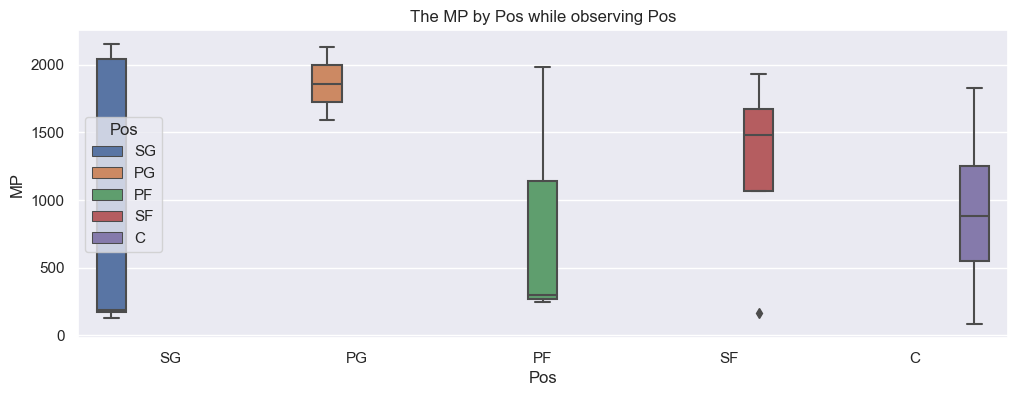

In [75]:
show_category("Pos", "MP", data=mia_player_data)

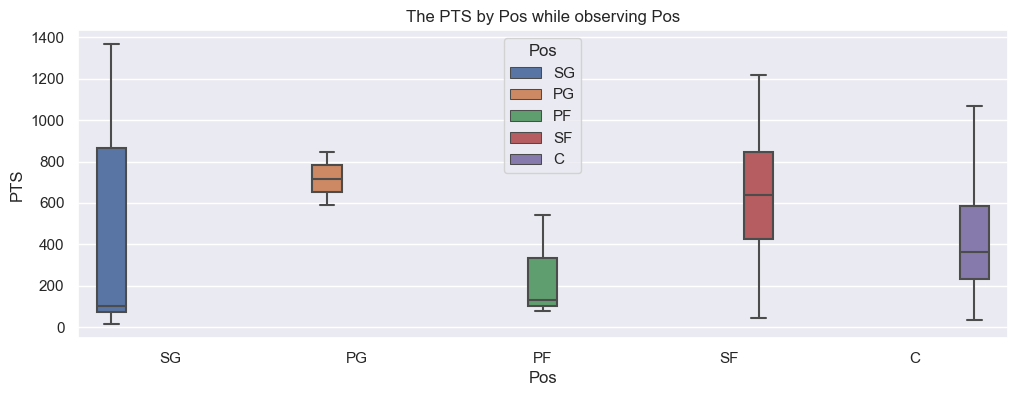

In [76]:
show_category("Pos", "PTS", data=mia_player_data)

In [77]:
mia_player_data.sort_values(by="Rating", ascending=False).head(10)

,Season,Player,Pos,Age,team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORB_per_game,DRB_per_game,TRB_per_game,AST_per_game,STL_per_game,BLK_per_game,TOV_per_game,PF_per_game,PTS_per_game,FG%_per_game,3P%_per_game,Rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110,2022,Jimmy Butler,SF,32.0,MIA,57.0,57.0,1931.0,398.0,829.0,0.480,27.0,116.0,0.233,371.0,713.0,0.520,0.496,396.0,455.0,0.870,102.0,234.0,336.0,312.0,94.0,27.0,121.0,88.0,1219.0,0.052822,0.121181,0.174003,0.161574,0.048679,0.013982,0.062662,0.045572,0.631279,0.000249,0.000121,98
478,2022,Kyle Lowry,PG,35.0,MIA,63.0,63.0,2133.0,276.0,627.0,0.440,144.0,382.0,0.377,132.0,245.0,0.539,0.555,148.0,174.0,0.851,33.0,249.0,282.0,474.0,67.0,17.0,168.0,177.0,844.0,0.015471,0.116737,0.132208,0.222222,0.031411,0.007970,0.078762,0.082982,0.395687,0.000206,0.000177,91
320,2022,Tyler Herro,SG,22.0,MIA,66.0,10.0,2151.0,501.0,1122.0,0.447,175.0,439.0,0.399,326.0,683.0,0.477,0.525,190.0,219.0,0.868,32.0,297.0,329.0,263.0,44.0,8.0,174.0,95.0,1367.0,0.014877,0.138075,0.152952,0.122269,0.020456,0.003719,0.080893,0.044166,0.635518,0.000208,0.000185,89
2,2022,Bam Adebayo,C,24.0,MIA,56.0,56.0,1825.0,406.0,729.0,0.557,0.0,6.0,0.000,406.0,723.0,0.562,0.557,256.0,340.0,0.753,137.0,427.0,564.0,190.0,80.0,44.0,148.0,171.0,1068.0,0.075068,0.233973,0.309041,0.104110,0.043836,0.024110,0.081096,0.093699,0.585205,0.000305,0.000000,84
777,2022,Gabe Vincent,PG,25.0,MIA,68.0,27.0,1589.0,214.0,513.0,0.417,119.0,323.0,0.368,95.0,190.0,0.500,0.533,44.0,54.0,0.815,22.0,104.0,126.0,210.0,62.0,12.0,98.0,158.0,591.0,0.013845,0.065450,0.079295,0.132159,0.039018,0.007552,0.061674,0.099434,0.371932,0.000262,0.000232,78
765,2022,P.J. Tucker,PF,36.0,MIA,71.0,70.0,1981.0,207.0,428.0,0.484,80.0,193.0,0.415,127.0,235.0,0.540,0.577,45.0,61.0,0.738,100.0,287.0,387.0,149.0,58.0,15.0,66.0,161.0,539.0,0.050480,0.144876,0.195356,0.075215,0.029278,0.007572,0.033317,0.081272,0.272085,0.000244,0.000209,77
492,2022,Caleb Martin,SF,26.0,MIA,60.0,12.0,1372.0,208.0,410.0,0.507,64.0,155.0,0.413,144.0,255.0,0.565,0.585,71.0,93.0,0.763,70.0,160.0,230.0,64.0,58.0,30.0,52.0,104.0,551.0,0.051020,0.116618,0.167638,0.046647,0.042274,0.021866,0.037901,0.075802,0.401603,0.000370,0.000301,76
170,2022,Dewayne Dedmon,C,32.0,MIA,67.0,15.0,1065.0,164.0,290.0,0.566,19.0,47.0,0.404,145.0,243.0,0.597,0.598,75.0,100.0,0.750,105.0,281.0,386.0,47.0,24.0,42.0,70.0,174.0,422.0,0.098592,0.263850,0.362441,0.044131,0.022535,0.039437,0.065728,0.163380,0.396244,0.000531,0.000379,72
729,2022,Max Strus,SF,25.0,MIA,68.0,16.0,1587.0,249.0,564.0,0.441,181.0,442.0,0.410,68.0,122.0,0.557,0.602,42.0,53.0,0.792,24.0,178.0,202.0,92.0,28.0,16.0,57.0,116.0,721.0,0.015123,0.112161,0.127284,0.057971,0.017643,0.010082,0.035917,0.073094,0.454316,0.000278,0.000258,72


***
>## Los Angeles Lakers
***

In [78]:
lak_player_data = player_data[player_data.team == "LAL"]

nop3 = len(player_data[player_data.team == "LAL"])
print(f" The Lakers had {nop2} players in their team")

 The Lakers had 18 players in their team


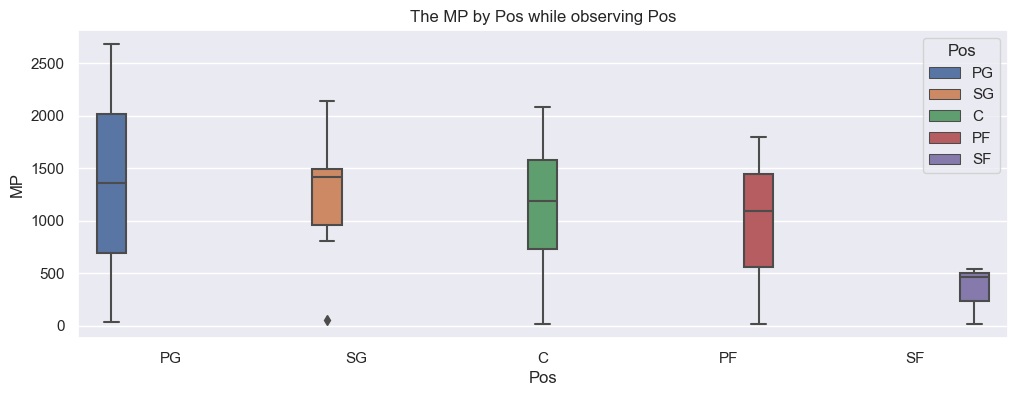

In [79]:
show_category("Pos", "MP", data=lak_player_data)

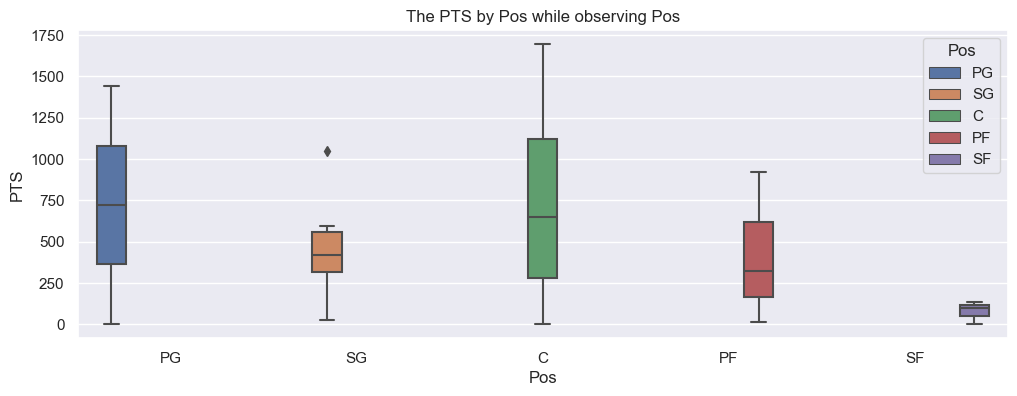

In [80]:
show_category("Pos", "PTS", data=lak_player_data)

In [81]:
lak_player_data.sort_values(by="Rating", ascending=False).head(10)

,Season,Player,Pos,Age,team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORB_per_game,DRB_per_game,TRB_per_game,AST_per_game,STL_per_game,BLK_per_game,TOV_per_game,PF_per_game,PTS_per_game,FG%_per_game,3P%_per_game,Rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802,2022,Russell Westbrook,PG,33.0,LAL,78.0,78.0,2678.0,548.0,1233.0,0.444,79.0,265.0,0.298,469.0,968.0,0.485,0.476,266.0,399.0,0.667,110.0,470.0,580.0,550.0,75.0,20.0,295.0,235.0,1441.0,0.041075,0.175504,0.216580,0.205377,0.028006,0.007468,0.110157,0.087752,0.538088,0.000166,0.000111,100
381,2022,LeBron James,C,37.0,LAL,56.0,56.0,2084.0,640.0,1221.0,0.524,161.0,448.0,0.359,479.0,773.0,0.620,0.590,254.0,336.0,0.756,63.0,396.0,459.0,349.0,73.0,59.0,196.0,121.0,1695.0,0.030230,0.190019,0.220250,0.167466,0.035029,0.028311,0.094050,0.058061,0.813340,0.000251,0.000172,88
536,2022,Malik Monk,SG,23.0,LAL,76.0,37.0,2139.0,391.0,826.0,0.473,173.0,442.0,0.391,218.0,384.0,0.568,0.578,93.0,117.0,0.795,37.0,219.0,256.0,218.0,61.0,29.0,122.0,138.0,1048.0,0.017298,0.102384,0.119682,0.101917,0.028518,0.013558,0.057036,0.064516,0.489949,0.000221,0.000183,85
166,2022,Anthony Davis,C,28.0,LAL,40.0,40.0,1404.0,370.0,695.0,0.532,13.0,70.0,0.186,357.0,625.0,0.571,0.542,174.0,244.0,0.713,106.0,288.0,394.0,122.0,49.0,90.0,82.0,97.0,927.0,0.075499,0.205128,0.280627,0.086895,0.034900,0.064103,0.058405,0.069088,0.660256,0.000379,0.000132,84
17,2022,Carmelo Anthony,PF,37.0,LAL,69.0,3.0,1793.0,319.0,723.0,0.441,149.0,397.0,0.375,170.0,326.0,0.521,0.544,132.0,159.0,0.830,62.0,226.0,288.0,68.0,47.0,52.0,59.0,166.0,919.0,0.034579,0.126046,0.160625,0.037925,0.026213,0.029002,0.032906,0.092582,0.512549,0.000246,0.000209,74
346,2022,Talen Horton-Tucker,SG,21.0,LAL,60.0,19.0,1511.0,224.0,538.0,0.416,49.0,182.0,0.269,175.0,356.0,0.492,0.462,100.0,125.0,0.800,37.0,156.0,193.0,159.0,59.0,29.0,82.0,148.0,597.0,0.024487,0.103243,0.127730,0.105228,0.039047,0.019193,0.054269,0.097948,0.395103,0.000275,0.000178,71
641,2022,Austin Reaves,SG,23.0,LAL,61.0,19.0,1418.0,146.0,318.0,0.459,53.0,167.0,0.317,93.0,151.0,0.616,0.542,99.0,118.0,0.839,45.0,148.0,193.0,110.0,29.0,20.0,40.0,87.0,444.0,0.031735,0.104372,0.136107,0.077574,0.020451,0.014104,0.028209,0.061354,0.313117,0.000324,0.000224,69
190,2022,Sekou Doumbouya,PF,21.0,LAL,2.0,0.0,16.0,5.0,8.0,0.625,1.0,2.0,0.500,4.0,6.0,0.667,0.688,3.0,4.0,0.750,2.0,4.0,6.0,0.0,3.0,2.0,2.0,1.0,14.0,0.125000,0.250000,0.375000,0.000000,0.187500,0.125000,0.125000,0.062500,0.875000,0.039062,0.031250,66
213,2022,Wayne Ellington,SG,34.0,LAL,43.0,9.0,810.0,98.0,237.0,0.414,82.0,211.0,0.389,16.0,26.0,0.615,0.586,9.0,11.0,0.818,10.0,67.0,77.0,30.0,23.0,5.0,19.0,42.0,287.0,0.012346,0.082716,0.095062,0.037037,0.028395,0.006173,0.023457,0.051852,0.354321,0.000511,0.000480,66


In [82]:
# break data into teams
team_finder(player_data)

In [83]:
boston_player = pd.read_csv(glob("C:/Users/DELL/Project/FreeWorks/NBA  Project/data/squad_data/*")[1])
boston_player

,ID,Season,Player,Pos,Age,team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORB_per_game,DRB_per_game,TRB_per_game,AST_per_game,STL_per_game,BLK_per_game,TOV_per_game,PF_per_game,PTS_per_game,FG%_per_game,3P%_per_game,Rating
0,734,2022,Jayson Tatum,SF,23.0,BOS,76.0,76.0,2731.0,708.0,1564.0,0.453,230.0,651.0,0.353,478.0,913.0,0.524,0.526,400.0,469.0,0.853,85.0,524.0,609.0,334.0,75.0,49.0,217.0,174.0,2046.0,0.031124,0.191871,0.222995,0.122300,0.027462,0.017942,0.079458,0.063713,0.749176,0.000166,0.000129,100
1,704,2022,Marcus Smart,PG,27.0,BOS,71.0,71.0,2296.0,300.0,718.0,0.418,119.0,360.0,0.331,181.0,358.0,0.506,0.501,142.0,179.0,0.793,42.0,228.0,270.0,417.0,119.0,18.0,159.0,160.0,861.0,0.018293,0.099303,0.117596,0.181620,0.051829,0.007840,0.069251,0.069686,0.375000,0.000182,0.000144,89
2,96,2022,Jaylen Brown,SF,25.0,BOS,66.0,66.0,2220.0,576.0,1217.0,0.473,166.0,464.0,0.358,410.0,753.0,0.544,0.541,241.0,318.0,0.758,53.0,351.0,404.0,231.0,70.0,18.0,178.0,163.0,1559.0,0.023874,0.158108,0.181982,0.104054,0.031532,0.008108,0.080180,0.073423,0.702252,0.000213,0.000161,97
3,345,2022,Al Horford,C,35.0,BOS,69.0,69.0,2005.0,266.0,569.0,0.467,89.0,265.0,0.336,177.0,304.0,0.582,0.546,80.0,95.0,0.842,108.0,422.0,530.0,232.0,49.0,92.0,65.0,130.0,701.0,0.053865,0.210474,0.264339,0.115711,0.024439,0.045885,0.032419,0.064838,0.349626,0.000233,0.000168,76
4,814,2022,Grant Williams,PF,23.0,BOS,77.0,21.0,1875.0,205.0,432.0,0.475,106.0,258.0,0.411,99.0,174.0,0.569,0.597,86.0,95.0,0.905,64.0,210.0,274.0,78.0,38.0,57.0,62.0,186.0,602.0,0.034133,0.112000,0.146133,0.041600,0.020267,0.030400,0.033067,0.099200,0.321067,0.000253,0.000219,72
5,818,2022,Robert Williams,C,24.0,BOS,61.0,61.0,1804.0,271.0,368.0,0.736,0.0,1.0,0.000,271.0,367.0,0.738,0.736,65.0,90.0,0.722,238.0,350.0,588.0,121.0,56.0,134.0,63.0,137.0,607.0,0.131929,0.194013,0.325942,0.067073,0.031042,0.074279,0.034922,0.075942,0.336475,0.000408,0.000000,79
6,635,2022,Payton Pritchard,PG,24.0,BOS,71.0,2.0,1001.0,160.0,373.0,0.429,101.0,245.0,0.412,59.0,128.0,0.461,0.564,21.0,21.0,1.000,32.0,102.0,134.0,139.0,25.0,6.0,41.0,61.0,442.0,0.031968,0.101898,0.133866,0.138861,0.024975,0.005994,0.040959,0.060939,0.441558,0.000429,0.000412,75
7,568,2022,Aaron Nesmith,SF,22.0,BOS,52.0,3.0,574.0,72.0,182.0,0.396,31.0,115.0,0.270,41.0,67.0,0.612,0.481,21.0,26.0,0.808,15.0,74.0,89.0,22.0,20.0,5.0,31.0,70.0,196.0,0.026132,0.128920,0.155052,0.038328,0.034843,0.008711,0.054007,0.121951,0.341463,0.000690,0.000470,65
8,243,2022,Enes Freedom,C,29.0,BOS,35.0,1.0,411.0,51.0,97.0,0.526,2.0,5.0,0.400,49.0,92.0,0.533,0.536,24.0,28.0,0.857,61.0,99.0,160.0,8.0,5.0,14.0,20.0,42.0,128.0,0.148418,0.240876,0.389294,0.019465,0.012165,0.034063,0.048662,0.102190,0.311436,0.001280,0.000973,54
9,310,2022,Sam Hauser,SF,24.0,BOS,26.0,0.0,158.0,23.0,50.0,0.460,19.0,44.0,0.432,4.0,6.0,0.667,0.650,0.0,0.0,NaN,5.0,24.0,29.0,10.0,1.0,2.0,2.0,7.0,65.0,0.031646,0.151899,0.183544,0.063291,0.006329,0.012658,0.012658,0.044304,0.411392,0.002911,0.002734,65


In [84]:
# get team strength from player data
team_stats = player_data.groupby("team")['ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '3P%', 'FT'].sum()
team_stats.reset_index(inplace=True)
team_stats.rename(columns={"team":"Alias"}, inplace=True)

In [85]:
df = df.merge(team_stats, on="Alias")
df

,team,Alias,Conference,score1,score2,win,loss,win_prob_avg,win_rate,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,3P%,FT
0,Hawks,ATL,E,116.976190,114.490476,122,88,0.629218,64.076048,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240,793.0,2672.0,3465.0,1956.0,544.0,335.0,874.0,1453.0,8834.0,5.597,1394.0
1,Celtics,BOS,E,115.245833,108.204167,160,80,0.459653,74.102324,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977,710.0,2415.0,3125.0,1609.0,464.0,397.0,852.0,1151.0,7286.0,4.225,1092.0
2,Nets,BRK,E,112.886256,110.654028,121,90,0.470244,62.254188,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458,615.0,2005.0,2620.0,1329.0,406.0,341.0,708.0,1208.0,7043.0,4.060,1011.0
3,Bulls,CHI,E,111.579487,110.712821,100,95,0.510336,55.323480,1469.032866,1511.286566,0.574517,0.425483,1467.443871,1512.875560,1460.233095,1503.130909,0.553235,0.446765,645.0,2652.0,3297.0,1929.0,567.0,327.0,970.0,1469.0,8937.0,5.266,1399.0
4,Hornets,CHO,E,109.173684,112.731579,76,114,0.481449,49.077552,1445.200474,1504.790798,0.552041,0.447959,1440.972582,1509.018690,1397.798650,1493.135932,0.490776,0.509224,818.0,2632.0,3450.0,2131.0,668.0,377.0,973.0,1523.0,8855.0,4.065,1207.0
5,Cavaliers,CLE,E,109.836634,108.004950,113,89,0.554787,56.545809,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542,785.0,2594.0,3379.0,1867.0,534.0,329.0,1001.0,1312.0,8277.0,4.285,1302.0
6,Mavericks,DAL,W,113.104265,109.862559,123,88,0.553692,70.015280,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847,649.0,2384.0,3033.0,1723.0,492.0,240.0,847.0,1404.0,7594.0,5.453,1074.0
7,Nuggets,DEN,W,115.863248,109.452991,170,64,0.448348,74.043977,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560,694.0,2715.0,3409.0,2185.0,564.0,290.0,1042.0,1489.0,8655.0,5.794,1270.0
8,Pistons,DET,E,108.895833,113.567708,55,137,0.460928,39.770827,1365.128557,1505.127145,0.443881,0.556119,1362.044399,1508.211303,1318.514590,1490.139047,0.397708,0.602292,771.0,2209.0,2980.0,1779.0,564.0,330.0,974.0,1561.0,7421.0,5.483,1194.0
9,Warriors,GSW,W,115.444954,110.096330,149,69,0.657109,60.841312,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587,799.0,2924.0,3723.0,2220.0,719.0,371.0,1173.0,1721.0,9096.0,5.018,1280.0


In [86]:
west, east = df[df["Conference"] == "W"], df[df["Conference"] == "E"]
west.sort_values(by="win_rate", ascending=False)

,team,Alias,Conference,score1,score2,win,loss,win_prob_avg,win_rate,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,3P%,FT
7,Nuggets,DEN,W,115.863248,109.452991,170,64,0.448348,74.043977,1587.177512,1521.211406,0.700362,0.299638,1587.500086,1520.888833,1599.607505,1516.441647,0.740440,0.259560,694.0,2715.0,3409.0,2185.0,564.0,290.0,1042.0,1489.0,8655.0,5.794,1270.0
28,Jazz,UTA,W,116.407767,110.830097,136,70,0.433414,71.873734,1578.857101,1505.973240,0.705684,0.294316,1577.504864,1507.325477,1561.952400,1488.035611,0.718737,0.281263,845.0,2760.0,3605.0,1770.0,553.0,377.0,1037.0,1460.0,8916.0,3.547,1415.0
23,Suns,PHO,W,114.982456,109.337719,153,75,0.513355,70.279132,1584.081302,1521.017308,0.692793,0.307207,1583.422176,1521.676434,1583.328294,1503.381361,0.702791,0.297209,703.0,2695.0,3398.0,2128.0,656.0,324.0,933.0,1490.0,8892.0,4.674,1220.0
6,Mavericks,DAL,W,113.104265,109.862559,123,88,0.553692,70.015280,1555.142148,1508.958036,0.679906,0.320094,1552.539937,1511.560246,1577.024242,1493.865931,0.700153,0.299847,649.0,2384.0,3033.0,1723.0,492.0,240.0,847.0,1404.0,7594.0,5.453,1074.0
12,Clippers,LAC,W,113.470046,109.341014,132,85,0.572873,66.652070,1557.234396,1516.182043,0.672411,0.327589,1555.184985,1518.231455,1567.475195,1509.130682,0.666521,0.333479,639.0,2488.0,3127.0,1815.0,535.0,322.0,955.0,1310.0,7994.0,4.368,1131.0
14,Grizzlies,MEM,W,116.028436,109.687204,147,64,0.590714,65.387566,1559.694445,1510.817332,0.683587,0.316413,1559.787640,1510.724138,1541.750112,1496.963176,0.653876,0.346124,1158.0,2872.0,4030.0,2131.0,800.0,533.0,1023.0,1618.0,9480.0,5.324,1393.0
17,Timberwolves,MIN,W,113.353234,113.646766,97,104,0.355977,61.934356,1470.685209,1512.084926,0.575471,0.424529,1468.304472,1514.465663,1502.416502,1490.347969,0.619344,0.380656,915.0,2681.0,3596.0,2090.0,717.0,454.0,1119.0,1777.0,9478.0,5.331,1471.0
18,Pelicans,NOP,W,114.701493,111.880597,108,93,0.511635,61.694357,1507.778221,1524.495066,0.603691,0.396309,1506.691320,1525.581967,1512.566885,1498.562111,0.616944,0.383056,827.0,2133.0,2960.0,1494.0,531.0,287.0,824.0,1283.0,6893.0,4.533,1216.0
9,Warriors,GSW,W,115.444954,110.096330,149,69,0.657109,60.841312,1545.515343,1516.090070,0.659651,0.340349,1545.927734,1515.677679,1517.037723,1514.407894,0.608413,0.391587,799.0,2924.0,3723.0,2220.0,719.0,371.0,1173.0,1721.0,9096.0,5.018,1280.0
13,Lakers,LAL,W,114.179825,110.135965,138,90,0.405173,60.611889,1542.759292,1518.878747,0.647401,0.352599,1542.200734,1519.437306,1527.825987,1521.469337,0.606119,0.393881,682.0,2583.0,3265.0,1836.0,592.0,381.0,1052.0,1483.0,8721.0,5.204,1330.0


In [87]:
east.sort_values(by="win_rate", ascending=False)

,team,Alias,Conference,score1,score2,win,loss,win_prob_avg,win_rate,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,3P%,FT
1,Celtics,BOS,E,115.245833,108.204167,160,80,0.459653,74.102324,1629.144872,1517.390745,0.748987,0.251013,1627.500510,1519.035108,1642.167855,1519.042152,0.741023,0.258977,710.0,2415.0,3125.0,1609.0,464.0,397.0,852.0,1151.0,7286.0,4.225,1092.0
16,Bucks,MIL,E,118.094170,111.044843,164,59,0.538374,73.160013,1625.550285,1513.480276,0.748743,0.251257,1623.984482,1515.046078,1616.488189,1503.016141,0.731600,0.268400,703.0,2614.0,3317.0,1759.0,543.0,290.0,941.0,1244.0,8618.0,4.536,1344.0
22,76ers,PHI,E,113.168950,107.470320,156,63,0.334512,72.580167,1598.249119,1517.107097,0.720402,0.279598,1597.398782,1517.957434,1615.731916,1506.322857,0.725802,0.274198,474.0,2105.0,2579.0,1425.0,498.0,359.0,696.0,1257.0,7451.0,3.623,1309.0
27,Raptors,TOR,E,112.592233,108.519417,123,83,0.570192,68.060655,1558.840051,1506.442276,0.682370,0.317630,1557.288266,1507.994061,1556.571846,1492.749732,0.680607,0.319393,1043.0,2515.0,3558.0,1734.0,691.0,361.0,924.0,1537.0,8719.0,4.267,1302.0
15,Heat,MIA,E,110.701245,107.435685,160,81,0.493439,64.128048,1568.130007,1526.068407,0.672597,0.327403,1566.945953,1527.252462,1557.260745,1523.306603,0.641280,0.358720,792.0,2747.0,3539.0,2078.0,604.0,262.0,1119.0,1656.0,8951.0,5.749,1401.0
0,Hawks,ATL,E,116.976190,114.490476,122,88,0.629218,64.076048,1496.545705,1519.673885,0.599060,0.400940,1495.912907,1520.306683,1521.298257,1495.274109,0.640760,0.359240,793.0,2672.0,3465.0,1956.0,544.0,335.0,874.0,1453.0,8834.0,5.597,1394.0
2,Nets,BRK,E,112.886256,110.654028,121,90,0.470244,62.254188,1534.971517,1512.854275,0.650805,0.349195,1532.733495,1515.092297,1519.269027,1500.640490,0.622542,0.377458,615.0,2005.0,2620.0,1329.0,406.0,341.0,708.0,1208.0,7043.0,4.060,1011.0
19,Knicks,NYK,E,110.824390,109.190244,108,97,0.369582,57.463805,1494.785139,1505.090834,0.615913,0.384087,1492.956457,1506.919516,1479.516973,1501.901348,0.574638,0.425362,928.0,2811.0,3739.0,1780.0,556.0,394.0,999.0,1652.0,8593.0,4.836,1437.0
11,Pacers,IND,E,115.338384,115.338384,95,103,0.444352,56.854711,1479.008853,1514.813300,0.578964,0.421036,1476.948190,1516.873964,1466.990503,1497.208160,0.568547,0.431453,513.0,1271.0,1784.0,830.0,287.0,291.0,505.0,835.0,4416.0,3.428,669.0
5,Cavaliers,CLE,E,109.836634,108.004950,113,89,0.554787,56.545809,1480.895450,1501.023980,0.597771,0.402229,1479.807344,1502.112086,1458.153182,1488.695107,0.565458,0.434542,785.0,2594.0,3379.0,1867.0,534.0,329.0,1001.0,1312.0,8277.0,4.285,1302.0


In [88]:
df.to_csv("C:/Users/DELL/Project/FreeWorks/NBA  Project/data/training.csv")

***
# Conclusion
****
`Methods and algorithms employed are purely for experimentation with little or no research backup. However the rtesults are insightful and could serve as the base for conducting a concrete research .`

***
# References
****
- Basketball. (2023, August 28). In Wikipedia. https://en.wikipedia.org/wiki/Basketball

- Mike Bueoy fivethirty eight (2023, August 28)https://fivethirtyeight.com/features/every-nba-teams-chance-of-winning-in-every-minute-across-every-game/

- Elo rating system. (2023, August 31). In Wikipedia. https://en.wikipedia.org/wiki/Elo_rating_system